In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import math

In [2]:
url = "https://raw.githubusercontent.com/arimitramaiti/datasets/master/articles/ra_logit_data_quiz2.csv"
dataset = pd.read_csv(url, error_bad_lines = False, header=0, index_col=None)
dataset.head(4)

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE,T_Skilled,T_Single,T_PresRes,IR_Bin,Age_Bin
0,1,0,6,4,0,0,0,1,0,0,...,2,1,1,0,1,1,1,1,1,0
1,2,1,48,2,0,0,0,1,0,0,...,2,1,0,0,0,0,0,0,0,0
2,3,3,12,4,0,0,0,0,1,0,...,1,2,0,0,1,0,0,0,0,1
3,4,0,42,2,0,0,1,0,0,0,...,2,2,0,0,1,0,0,0,0,1


__Added Attributes and their descriptions__
 - T_Skilled : Telephone Connection Yes & Job Nature is Skilled employee/official
 - T_Single : Telephone Connection Yes & Applicant is Male and Single
 - T_PresRes : Telephone Connection Yes & Present Resident is 1-2yrs OR 2-3yrs OR >=3yrs
 - IR_Bin : 0 if Installment Rate is 1 OR 2, 1 if Installment Rate is 3 OR 4
 - Age_Bin : 1 if Age is between 30 & 55 years, 0 if Age is of any other value

In [3]:
dataset.isnull().sum()/dataset.shape[0] * 100

OBS#                0.0
CHK_ACCT            0.0
DURATION            0.0
HISTORY             0.0
NEW_CAR             0.0
USED_CAR            0.0
FURNITURE           0.0
RADIO/TV            0.0
EDUCATION           0.0
RETRAINING          0.0
AMOUNT              0.0
SAV_ACCT            0.0
EMPLOYMENT          0.0
INSTALL_RATE        0.0
MALE_DIV            0.0
MALE_SINGLE         0.0
MALE_MAR_or_WID     0.0
CO-APPLICANT        0.0
GUARANTOR           0.0
PRESENT_RESIDENT    0.0
REAL_ESTATE         0.0
PROP_UNKN_NONE      0.0
AGE                 0.0
OTHER_INSTALL       0.0
RENT                0.0
OWN_RES             0.0
NUM_CREDITS         0.0
JOB                 0.0
NUM_DEPENDENTS      0.0
TELEPHONE           0.0
FOREIGN             0.0
RESPONSE            0.0
T_Skilled           0.0
T_Single            0.0
T_PresRes           0.0
IR_Bin              0.0
Age_Bin             0.0
dtype: float64

__If Response is 0 then it implies Bad Credit Customer, else it implies Good Credit Customer__

In [4]:
credit_mapping = {0:"Bad Credit", 1:"Good Credit"}
dataset["RESPONSE_DESC"] = dataset.RESPONSE.map(credit_mapping)

__Bi-variate Frequency or Distribution Plots to explore data__

 - __50% of Good credit customers have No checking account with the bank, compared to only 15% of Bad credit customers__

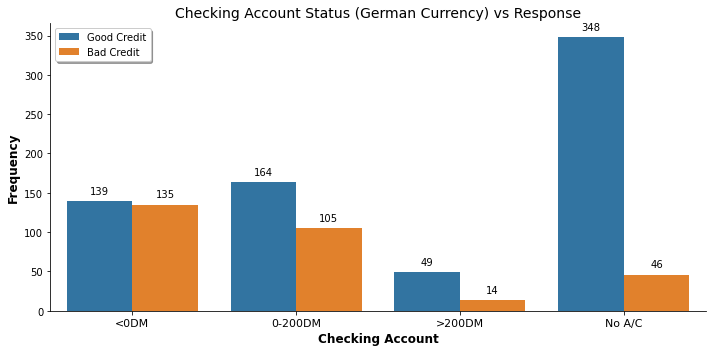

In [5]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='CHK_ACCT', data=dataset, hue='RESPONSE_DESC', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Checking Account Status (German Currency) vs Response', fontsize=14)
axes.set_xlabel('Checking Account', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
axes.set_xticklabels(['<0DM', '0-200DM', '>200DM', 'No A/C'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __Bad credit customers seem to have a credit durtion of 24 months, compared to 19 months for Good customers__

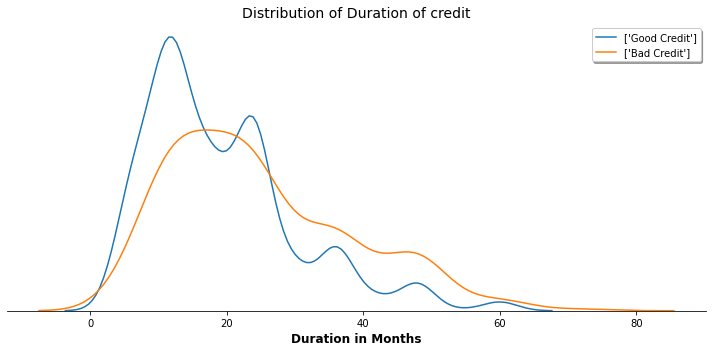

In [6]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
sns.distplot(dataset.loc[dataset.RESPONSE==1, 'DURATION'], hist=False, kde=True, ax=axes, label=['Good Credit']);
sns.distplot(dataset.loc[dataset.RESPONSE==0, 'DURATION'], hist=False, kde=True, ax=axes, label=['Bad Credit']);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['left'].set_visible(False)
axes.axes.get_yaxis().set_visible(False)
axes.set_title('Distribution of Duration of credit', fontsize=14)
axes.set_xlabel('Duration in Months', fontsize=12, weight='bold')
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __More than 50% of both Good & Bad customers have existing duly credits paid back until now__

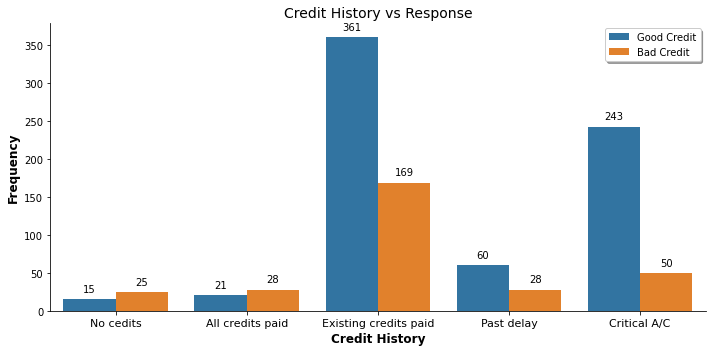

In [7]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='HISTORY', data=dataset, hue='RESPONSE_DESC', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Credit History vs Response', fontsize=14)
axes.set_xlabel('Credit History', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
axes.set_xticklabels(['No cedits', 'All credits paid', 'Existing credits paid', 'Past delay', 'Critical A/C'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __30% of Bad credit customers have taken credit mentioning purchase of new car__

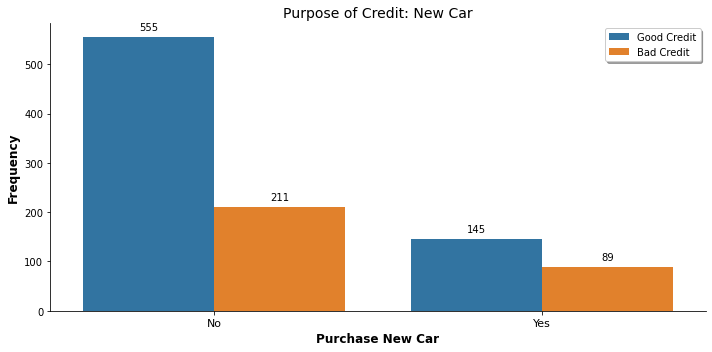

In [8]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='NEW_CAR', data=dataset, hue='RESPONSE_DESC', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Purpose of Credit: New Car', fontsize=14)
axes.set_xlabel('Purchase New Car', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
axes.set_xticklabels(['No', 'Yes'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __Only 6% of Bad credit customers have taken credit mentioning purchase of Used car__

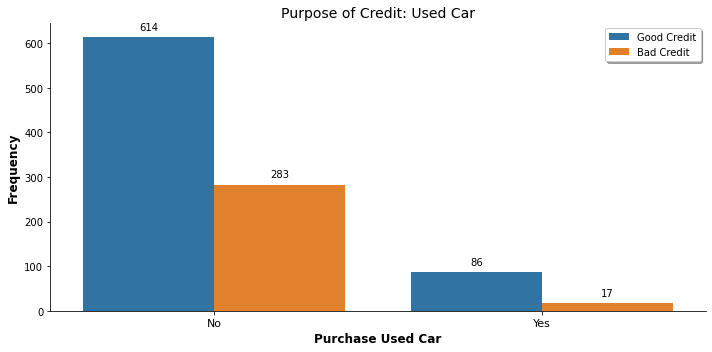

In [9]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='USED_CAR', data=dataset, hue='RESPONSE_DESC', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Purpose of Credit: Used Car', fontsize=14)
axes.set_xlabel('Purchase Used Car', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
axes.set_xticklabels(['No', 'Yes'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __19% of Bad credit customers have taken credit mentioning purchase of new furniture__

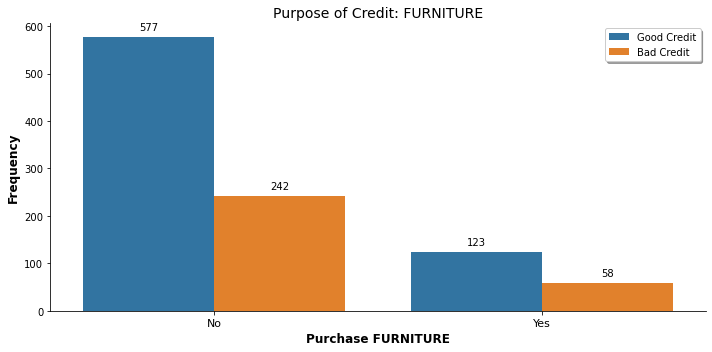

In [10]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='FURNITURE', data=dataset, hue='RESPONSE_DESC', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Purpose of Credit: FURNITURE', fontsize=14)
axes.set_xlabel('Purchase FURNITURE', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
axes.set_xticklabels(['No', 'Yes'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __21% of Bad credit customers have taken credit mentioning purchase of Radio or Television__

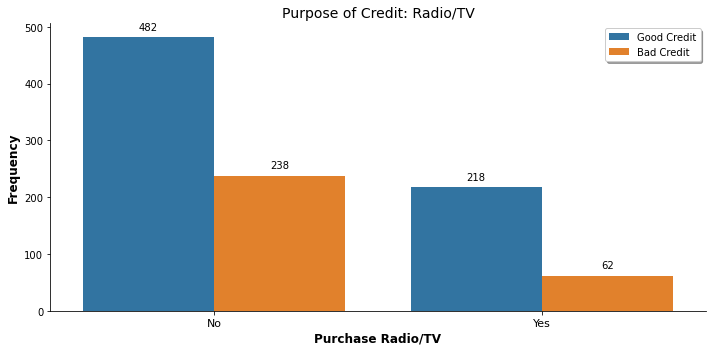

In [11]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='RADIO/TV', data=dataset, hue='RESPONSE_DESC', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Purpose of Credit: Radio/TV', fontsize=14)
axes.set_xlabel('Purchase Radio/TV', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
axes.set_xticklabels(['No', 'Yes'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __Only 7% of Bad credit customers have taken credit to pursue education__

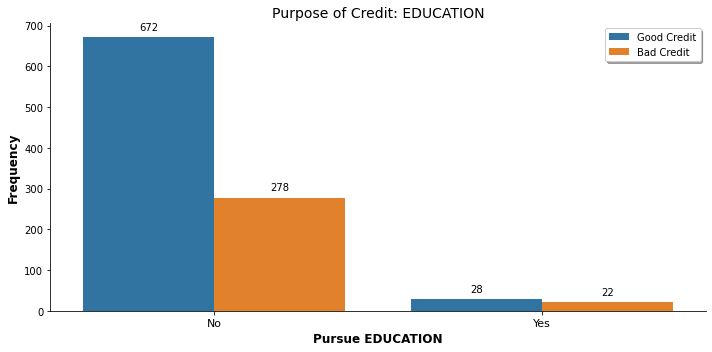

In [12]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='EDUCATION', data=dataset, hue='RESPONSE_DESC', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Purpose of Credit: EDUCATION', fontsize=14)
axes.set_xlabel('Pursue EDUCATION', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
axes.set_xticklabels(['No', 'Yes'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __Only 11% of Bad credit customers have taken credit to pursue Retraining__

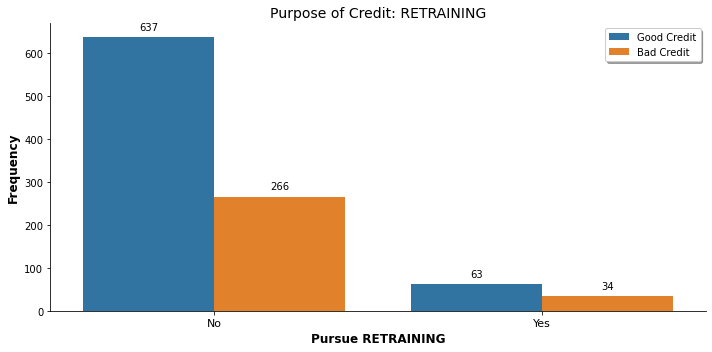

In [13]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='RETRAINING', data=dataset, hue='RESPONSE_DESC', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Purpose of Credit: RETRAINING', fontsize=14)
axes.set_xlabel('Pursue RETRAINING', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
axes.set_xticklabels(['No', 'Yes'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __On an average Bad credit customers take 1000 Deusche Mark more credit than Good credit customers__

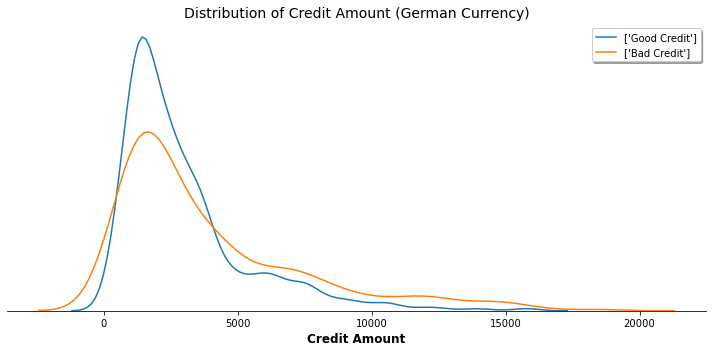

In [14]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
sns.distplot(dataset.loc[dataset.RESPONSE==1, 'AMOUNT'], hist=False, kde=True, ax=axes, label=['Good Credit']);
sns.distplot(dataset.loc[dataset.RESPONSE==0, 'AMOUNT'], hist=False, kde=True, ax=axes, label=['Bad Credit']);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['left'].set_visible(False)
axes.axes.get_yaxis().set_visible(False)
axes.set_title('Distribution of Credit Amount (German Currency)', fontsize=14)
axes.set_xlabel('Credit Amount', fontsize=12, weight='bold')
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __72% of Bad credit customers and 55% of Good credit customers have less than a 100 DM in their savings a/c__

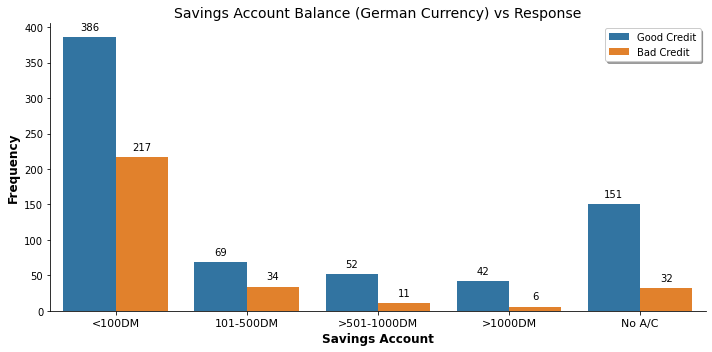

In [15]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='SAV_ACCT', data=dataset, hue='RESPONSE_DESC', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Savings Account Balance (German Currency) vs Response', fontsize=14)
axes.set_xlabel('Savings Account', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
axes.set_xticklabels(['<100DM', '101-500DM', '>501-1000DM', '>1000DM', 'No A/C'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __Approximately 50% of customers fall within 1-6 years of work experience__

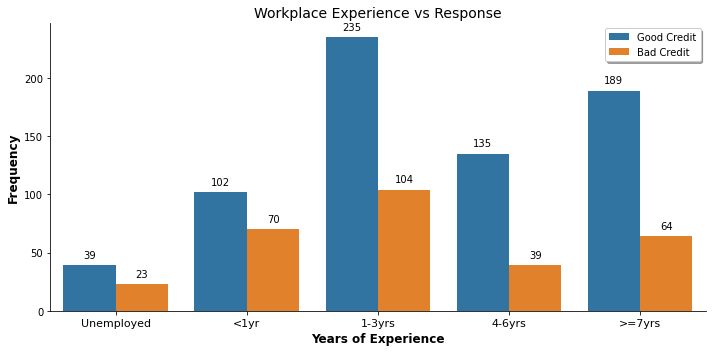

In [16]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='EMPLOYMENT', data=dataset, hue='RESPONSE_DESC', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Workplace Experience vs Response', fontsize=14)
axes.set_xlabel('Years of Experience', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
axes.set_xticklabels(['Unemployed', '<1yr', '1-3yrs', '4-6yrs', '>=7yrs'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __On an average both good and bad customers have same installment rate__

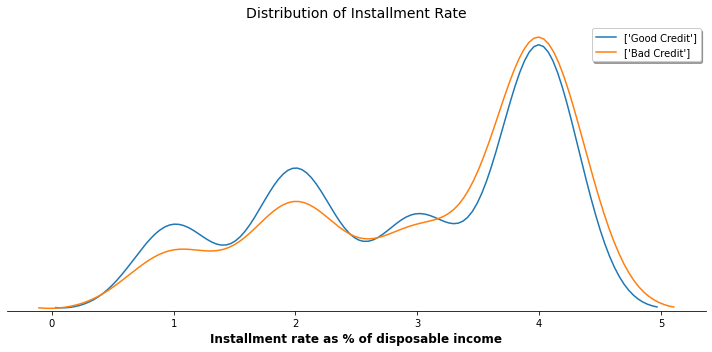

In [17]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
sns.distplot(dataset.loc[dataset.RESPONSE==1, 'INSTALL_RATE'], hist=False, kde=True, ax=axes, label=['Good Credit']);
sns.distplot(dataset.loc[dataset.RESPONSE==0, 'INSTALL_RATE'], hist=False, kde=True, ax=axes, label=['Bad Credit']);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['left'].set_visible(False)
axes.axes.get_yaxis().set_visible(False)
axes.set_title('Distribution of Installment Rate', fontsize=14)
axes.set_xlabel('Installment rate as % of disposable income', fontsize=12, weight='bold')
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __Only 7% of Bad customers are male as well as divorced__

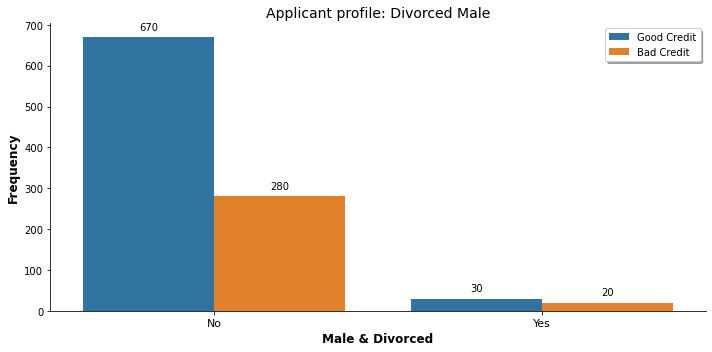

In [18]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='MALE_DIV', data=dataset, hue='RESPONSE_DESC', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Divorced Male', fontsize=14)
axes.set_xlabel('Male & Divorced', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
axes.set_xticklabels(['No', 'Yes'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __Approximately 50% of bad or good customers are male as well as single__

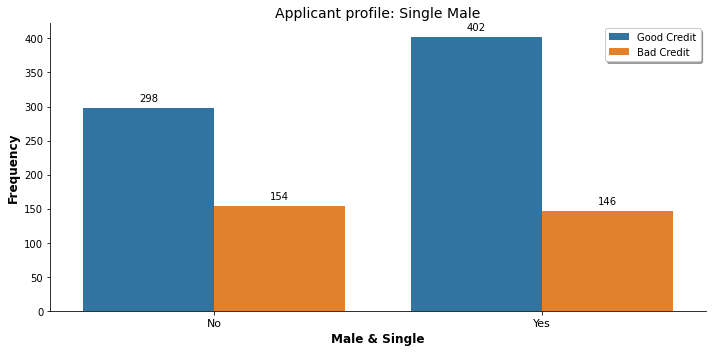

In [19]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='MALE_SINGLE', data=dataset, hue='RESPONSE_DESC', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Single Male', fontsize=14)
axes.set_xlabel('Male & Single', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
axes.set_xticklabels(['No', 'Yes'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __Approximately 8% of Bad customers are male as well as married or widow__

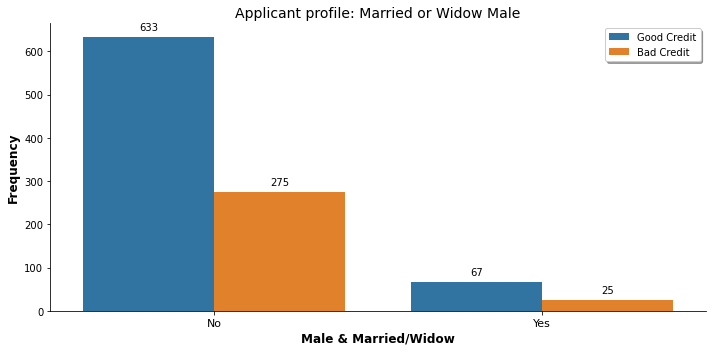

In [20]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='MALE_MAR_or_WID', data=dataset, hue='RESPONSE_DESC', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Married or Widow Male', fontsize=14)
axes.set_xlabel('Male & Married/Widow', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
axes.set_xticklabels(['No', 'Yes'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __Bad or Good credit customers mostly do not have a co-applicant while taking credit from bank__

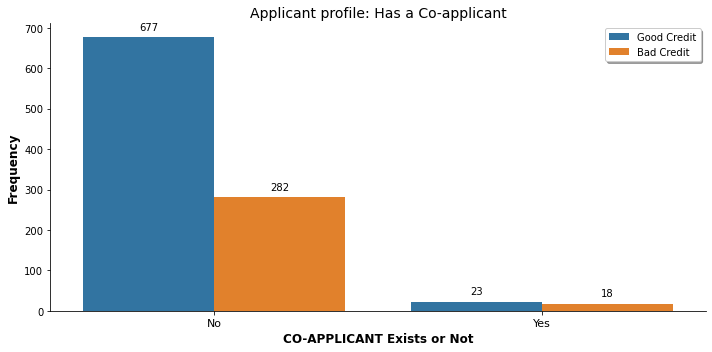

In [21]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='CO-APPLICANT', data=dataset, hue='RESPONSE_DESC', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Has a Co-applicant', fontsize=14)
axes.set_xlabel('CO-APPLICANT Exists or Not', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
axes.set_xticklabels(['No', 'Yes'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __Most of the Bad or Good credit customers do not have Guarantor while taking credit__

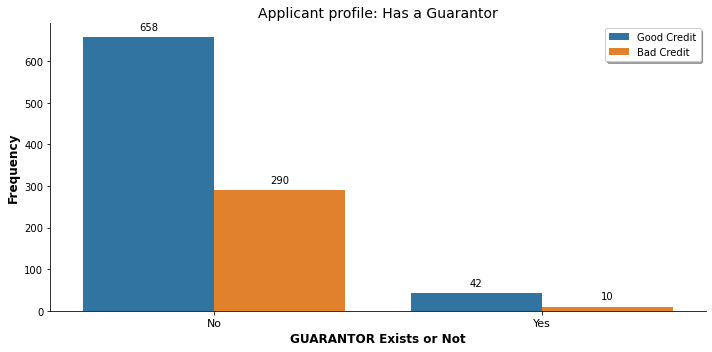

In [22]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='GUARANTOR', data=dataset, hue='RESPONSE_DESC', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Has a Guarantor', fontsize=14)
axes.set_xlabel('GUARANTOR Exists or Not', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
axes.set_xticklabels(['No', 'Yes'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __Around 40% of both Good and Bad customers have residing more than 3 years in the location mentioned__

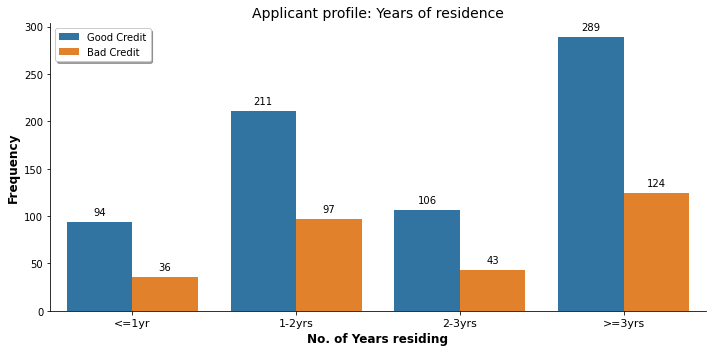

In [23]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='PRESENT_RESIDENT', data=dataset, hue='RESPONSE_DESC', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Years of residence', fontsize=14)
axes.set_xlabel('No. of Years residing', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
axes.set_xticklabels(['<=1yr', '1-2yrs', '2-3yrs', '>=3yrs'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __Around 20% bad credit customers own real estate__

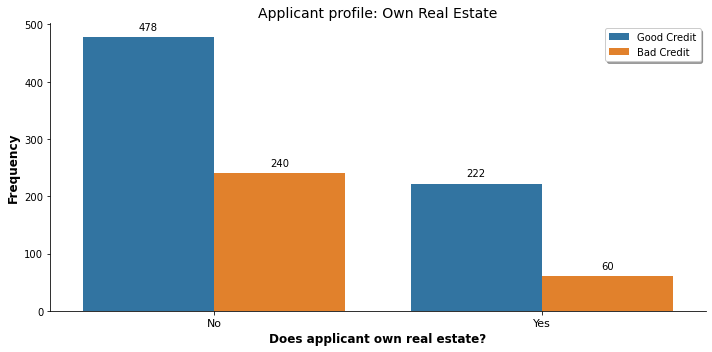

In [24]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='REAL_ESTATE', data=dataset, hue='RESPONSE_DESC', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Own Real Estate', fontsize=14)
axes.set_xlabel('Does applicant own real estate?', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
axes.set_xticklabels(['No', 'Yes'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __Around 78% of bad credit customers property can be identified by bank__

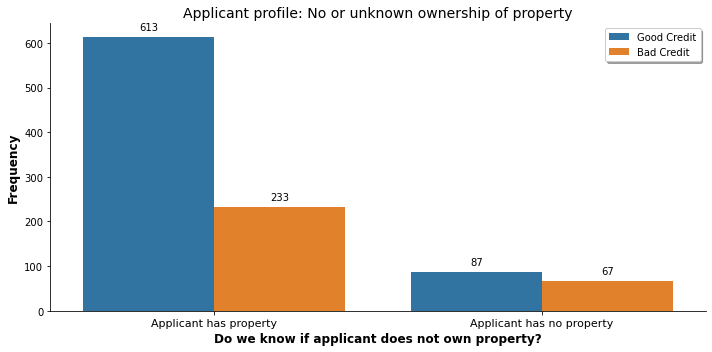

In [25]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='PROP_UNKN_NONE', data=dataset, hue='RESPONSE_DESC', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: No or unknown ownership of property', fontsize=14)
axes.set_xlabel('Do we know if applicant does not own property?', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
axes.set_xticklabels(['Applicant has property', 'Applicant has no property'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __Bad credit customers on an average are 2 years younger than Good credit customers__

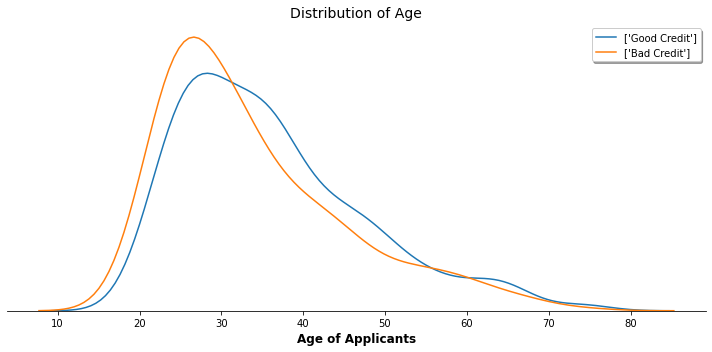

In [26]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
sns.distplot(dataset.loc[dataset.RESPONSE==1, 'AGE'], hist=False, kde=True, ax=axes, label=['Good Credit']);
sns.distplot(dataset.loc[dataset.RESPONSE==0, 'AGE'], hist=False, kde=True, ax=axes, label=['Bad Credit']);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['left'].set_visible(False)
axes.axes.get_yaxis().set_visible(False)
axes.set_title('Distribution of Age', fontsize=14)
axes.set_xlabel('Age of Applicants', fontsize=12, weight='bold')
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __1/4th of bad credit customers have other credit engagements apart from the current loan in question__

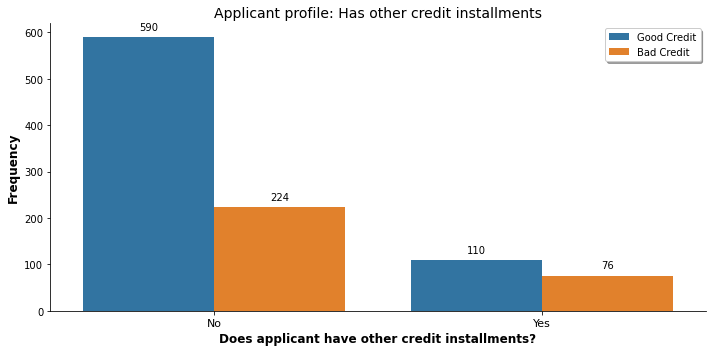

In [27]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='OTHER_INSTALL', data=dataset, hue='RESPONSE_DESC', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Has other credit installments', fontsize=14)
axes.set_xlabel('Does applicant have other credit installments?', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
axes.set_xticklabels(['No', 'Yes'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __Approximately 1/4th of bad credit customers also stay on rent__

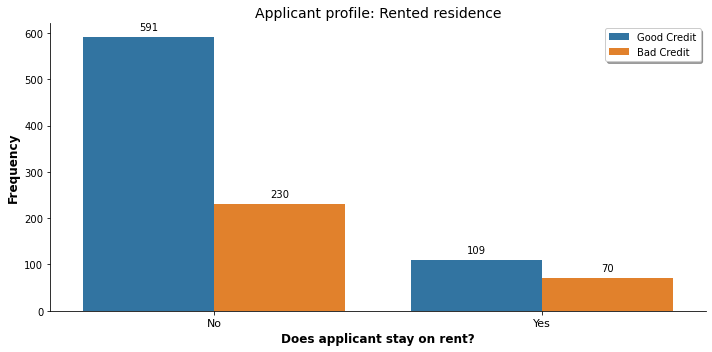

In [28]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='RENT', data=dataset, hue='RESPONSE_DESC', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Rented residence', fontsize=14)
axes.set_xlabel('Does applicant stay on rent?', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
axes.set_xticklabels(['No', 'Yes'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __62% of bad credit customers applied from own residence__

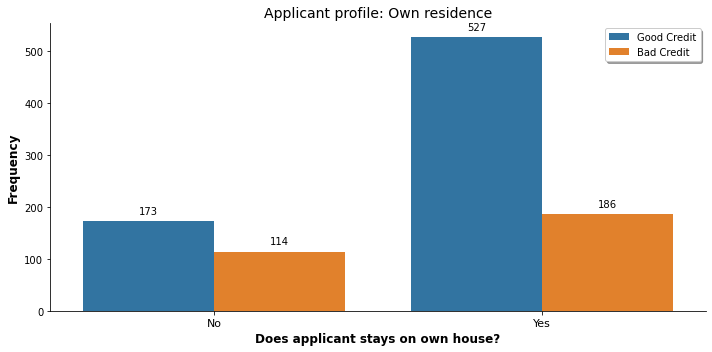

In [29]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='OWN_RES', data=dataset, hue='RESPONSE_DESC', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Own residence', fontsize=14)
axes.set_xlabel('Does applicant stays on own house?', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
axes.set_xticklabels(['No', 'Yes'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __Both Good and Bad customers have same existing credits at the bank__

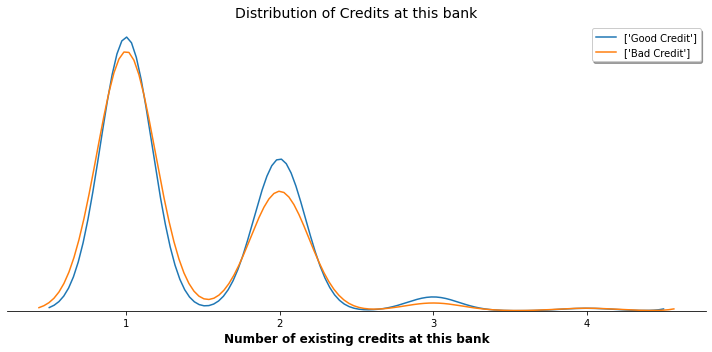

In [30]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
sns.distplot(dataset.loc[dataset.RESPONSE==1, 'NUM_CREDITS'], hist=False, kde=True, ax=axes, label=['Good Credit']);
sns.distplot(dataset.loc[dataset.RESPONSE==0, 'NUM_CREDITS'], hist=False, kde=True, ax=axes, label=['Bad Credit']);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['left'].set_visible(False)
axes.axes.get_yaxis().set_visible(False)
axes.set_title('Distribution of Credits at this bank', fontsize=14)
axes.set_xlabel('Number of existing credits at this bank', fontsize=12, weight='bold')
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __More than 60% of both good or bad customers are skilled employees__

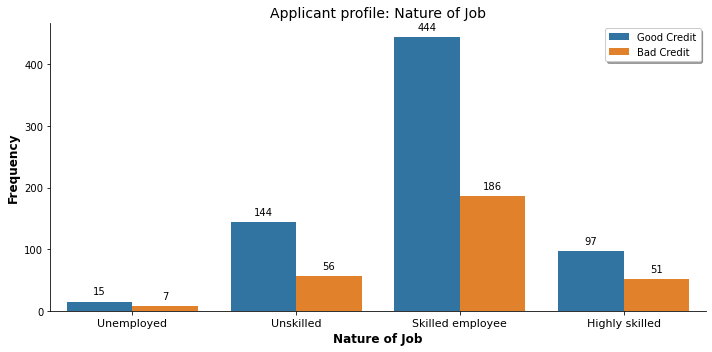

In [31]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='JOB', data=dataset, hue='RESPONSE_DESC', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Nature of Job', fontsize=14)
axes.set_xlabel('Nature of Job', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
axes.set_xticklabels(['Unemployed', 'Unskilled', 'Skilled employee', 'Highly skilled'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __Mostly customers have 1 member to look after, at max it is 2__

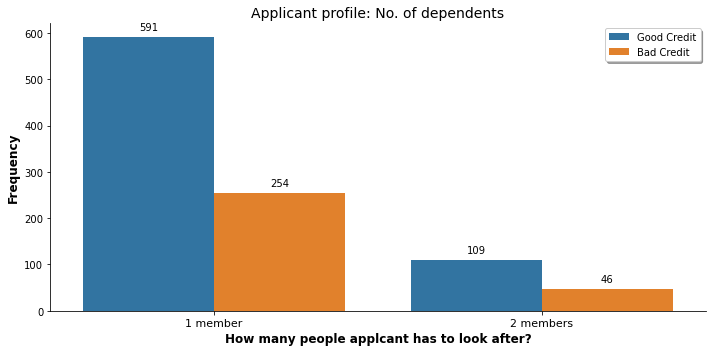

In [32]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='NUM_DEPENDENTS', data=dataset, hue='RESPONSE_DESC', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: No. of dependents', fontsize=14)
axes.set_xlabel('How many people applcant has to look after?', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
axes.set_xticklabels(['1 member', '2 members'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __Surprisingly more than 50% of customers do not have a telephone connection directly under his/her name__

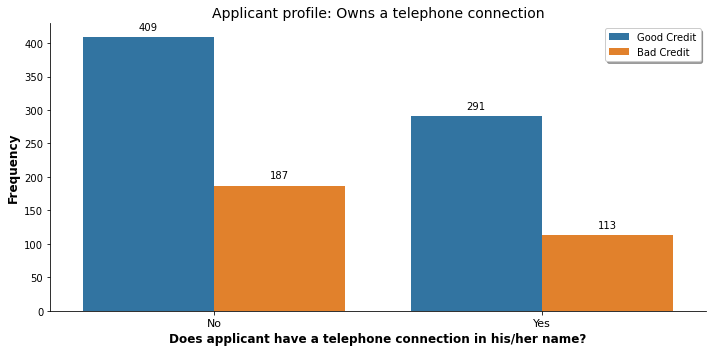

In [33]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='TELEPHONE', data=dataset, hue='RESPONSE_DESC', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Owns a telephone connection', fontsize=14)
axes.set_xlabel('Does applicant have a telephone connection in his/her name?', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
axes.set_xticklabels(['No', 'Yes'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

 - __A very miniscule portion of customers are required to work from foreign countries__

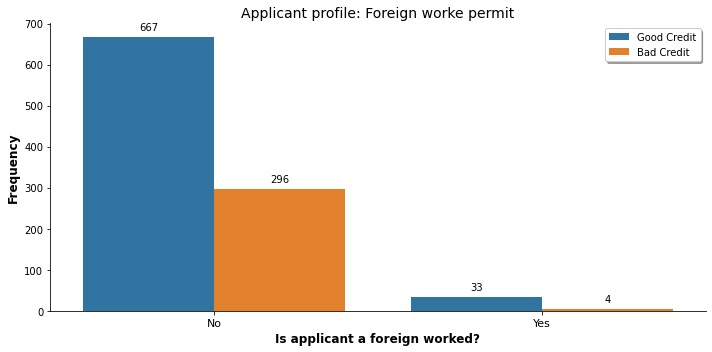

In [34]:
fig, axes = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)
splot = sns.countplot(x='FOREIGN', data=dataset, hue='RESPONSE_DESC', ax=axes);
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_title('Applicant profile: Foreign worke permit', fontsize=14)
axes.set_xlabel('Is applicant a foreign worked?', fontsize=12, weight='bold')
axes.set_ylabel('Frequency', fontsize=12, weight='bold')
axes.set_xticklabels(['No', 'Yes'], fontsize=11)
##Source Code: Start
##Link : https://github.com/mwaskom/seaborn/issues/1582
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2.,
         p.get_height()), ha = 'center', va = 'center',
        xytext = (0, 10), textcoords = 'offset points')
##Source Code: End
axes.legend(loc='best', shadow=True,fontsize='medium')
fig.tight_layout()
plt.show()

In [35]:
# import ppscore as pps
# import warnings
# warnings.filterwarnings("ignore")
# a = pps.matrix(dataset)
# a.to_excel("E:/IIM-A Docs/RA/Logistic Regression/Quiz2/pps.xlsx", sheet_name='Sheet1', index=True)

__Concluding bi-variate data exploration__

1. __50% of Good credit customers have No checking account with the bank, compared to only 15% of Bad credit customers__
2. __Bad credit customers seem to have a credit duration of 24 months, compared to 19 months for Good customers__
3. __More than 50% of both Good & Bad customers have existing duly credits paid back until now__
4. __30% of Bad credit customers have taken credit mentioning purchase of new car__
5. __Only 6% of Bad credit customers have taken credit mentioning purchase of Used car__
6. 19% of Bad credit customers have taken credit mentioning purchase of new furniture
7. 21% of Bad credit customers have taken credit mentioning purchase of Radio or Television
8. Only 7% of Bad credit customers have taken credit to pursue education
9. Only 11% of Bad credit customers have taken credit to pursue Retraining
10. On an average Bad credit customers take 1000 Deusche Mark more credit than Good credit customers
11. __72% of Bad credit customers and 55% of Good credit customers have less than a 100 DM in their savings a/c__
12. __Approximately 50% of customers fall within 1-6 years of work experience__
13. On an average both good and bad customers have same installment rate
14. Only 7% of Bad customers are male as well as divorced
15. Approximately 50% of bad or good customers are male as well as single
16. Approximately 8% of Bad customers are male as well as married or widow
17. Bad or Good credit customers mostly do not have a co-applicant while taking credit from bank
18. __Most of the Bad or Good credit customers do not have Guarantor while taking credit__
19. Around 40% of both Good and Bad customers have residing more than 3 years in the location mentioned
20. __Around 20% bad credit customers own real estate__
21. Around 78% of bad credit customers property can be identified by bank
22. Bad credit customers on an average are 2 years younger than Good credit customers
23. 1/4th of bad credit customers have other credit engagements apart from the current loan in question
24. __Approximately 1/4th of bad credit customers also stay on rent__
25. 62% of bad credit customers applied from own residence
26. Both Good and Bad customers have same existing credits at the bank
27. More than 60% of both good or bad customers are skilled employees
28. Mostly customers have 1 member to look after, at max it is 2
29. Surprisingly more than 50% of customers do not have a telephone connection directly under his/her name
30. __A very miniscule portion of customers are required to work from foreign countries__

In [36]:
df_selectcols = dataset.copy()
df_selectcols.drop(["OBS#", "RESPONSE_DESC"], axis=1, inplace=True)
df_selectcols.rename(columns = {'RADIO/TV':'RADIO_TV',
                               'CO-APPLICANT':'COAPPLICANT'}, inplace = True)

In [37]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from patsy import dmatrices
from sklearn.metrics import confusion_matrix, roc_auc_score

__Run the logistic regression model using all predictors and Interpret the result__

In [38]:
y, X = dmatrices('RESPONSE ~ CHK_ACCT+DURATION+HISTORY+NEW_CAR+USED_CAR+FURNITURE+RADIO_TV+EDUCATION+RETRAINING+AMOUNT+SAV_ACCT+EMPLOYMENT+INSTALL_RATE+MALE_DIV+MALE_SINGLE+MALE_MAR_or_WID+COAPPLICANT+GUARANTOR+PRESENT_RESIDENT+REAL_ESTATE+PROP_UNKN_NONE+AGE+OTHER_INSTALL+RENT+OWN_RES+NUM_CREDITS+JOB+NUM_DEPENDENTS+TELEPHONE+FOREIGN',
                 df_selectcols, return_type = 'dataframe')

In [39]:
model1 = sm.Logit(y, X).fit()
print(model1.summary())
# print(model1.params)

Optimization terminated successfully.
         Current function value: 0.454598
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      969
Method:                           MLE   Df Model:                           30
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2558
Time:                        21:08:19   Log-Likelihood:                -454.60
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 8.882e-49
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0162      0.867      1.171      0.241      -0.684       2.716
CHK_ACCT   

In [40]:
# model1.pred_table(threshold=0.73)
model1.pred_table(threshold=0.50)

array([[164., 136.],
       [ 68., 632.]])

In [41]:
TP = model1.pred_table()[1,1]
TN = model1.pred_table()[0,0]
FN = model1.pred_table()[0,1]
FP = model1.pred_table()[1,0]

model1_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(f"Model Accuracy is {model1_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

Model Accuracy is 0.796
F1-Score for Y=1 is 0.861
Recall Score for Y=1 or Sensitivity is 0.823
Precision Score for Y=1 is 0.903
F1-Score for Y=0 is 0.617
Recall Score for Y=0 or Specificity is 0.707
Precision Score for Y=0 is 0.547


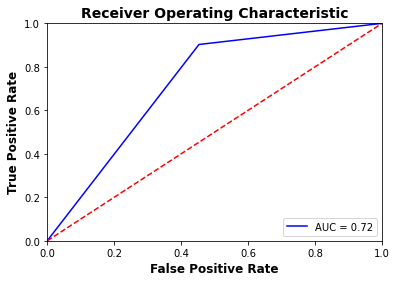

In [42]:
##Source:https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
predictions = model1.predict(X)
fpr, tpr, threshold = metrics.roc_curve(y.values, (predictions>0.50).astype(int).values.reshape(-1,1))
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic', fontsize=14, weight='bold')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=12, weight='bold')
plt.xlabel('False Positive Rate', fontsize=12, weight='bold')
plt.show()

In [43]:
print(model1.aic)

971.1957005898653


__Cutoff to maximize AUC__

In [44]:
for i in np.linspace(0,1,30,endpoint=False):
    fpr, tpr, threshold = metrics.roc_curve(y.values, (predictions>i).astype(int).values.reshape(-1,1))
    roc_auc = round(metrics.auc(fpr, tpr),3)
    x = round(i,2)
    print(f"{x} has {roc_auc}")

0.0 has 0.5
0.03 has 0.5
0.07 has 0.508
0.1 has 0.516
0.13 has 0.536
0.17 has 0.545
0.2 has 0.556
0.23 has 0.579
0.27 has 0.593
0.3 has 0.612
0.33 has 0.638
0.37 has 0.654
0.4 has 0.674
0.43 has 0.687
0.47 has 0.703
0.5 has 0.725
0.53 has 0.727
0.57 has 0.728
0.6 has 0.733
0.63 has 0.744
0.67 has 0.754
0.7 has 0.754
0.73 has 0.758
0.77 has 0.746
0.8 has 0.732
0.83 has 0.711
0.87 has 0.694
0.9 has 0.66
0.93 has 0.614
0.97 has 0.558


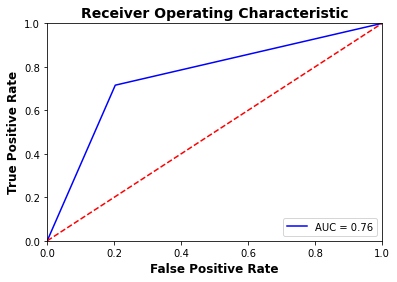

In [45]:
##Source:https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
predictions = model1.predict(X)
fpr, tpr, threshold = metrics.roc_curve(y.values, (predictions>0.73).astype(int).values.reshape(-1,1))
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic', fontsize=14, weight='bold')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=12, weight='bold')
plt.xlabel('False Positive Rate', fontsize=12, weight='bold')
plt.show()

__Create Dummy columns before splitting data into train and test set__

In [46]:
dummies_CHK_ACCT = pd.get_dummies(dataset['CHK_ACCT'], prefix="CHK_ACCT", drop_first=False)

dummies_HISTORY = pd.get_dummies(dataset['HISTORY'], prefix="HISTORY", drop_first=False)

dummies_NEW_CAR = pd.get_dummies(dataset['NEW_CAR'], prefix="NEW_CAR", drop_first=False)

dummies_USED_CAR = pd.get_dummies(dataset['USED_CAR'], prefix="USED_CAR", drop_first=False)

dummies_FURNITURE = pd.get_dummies(dataset['FURNITURE'], prefix="FURNITURE", drop_first=False)

dummies_RADIO_TV = pd.get_dummies(dataset['RADIO/TV'], prefix="RADIO_TV", drop_first=False)

dummies_EDUCATION = pd.get_dummies(dataset['EDUCATION'], prefix="EDUCATION", drop_first=False)

dummies_RETRAINING = pd.get_dummies(dataset['RETRAINING'], prefix="RETRAINING", drop_first=False)

dummies_SAV_ACCT = pd.get_dummies(dataset['SAV_ACCT'], prefix="SAV_ACCT", drop_first=False)

dummies_EMPLOYMENT = pd.get_dummies(dataset['EMPLOYMENT'], prefix="EMPLOYMENT", drop_first=False)

dummies_MALE_DIV = pd.get_dummies(dataset['MALE_DIV'], prefix="MALE_DIV", drop_first=False)

dummies_MALE_SINGLE = pd.get_dummies(dataset['MALE_SINGLE'], prefix="MALE_SINGLE", drop_first=False)

dummies_MALE_MAR_WID = pd.get_dummies(dataset['MALE_MAR_or_WID'], prefix="MALE_MAR_WID", drop_first=False)

dummies_COAPPLICANT = pd.get_dummies(dataset['CO-APPLICANT'], prefix="COAPPLICANT", drop_first=False)

dummies_GUARANTOR = pd.get_dummies(dataset['GUARANTOR'], prefix="GUARANTOR", drop_first=False)

dummies_PRESENT_RESIDENT = pd.get_dummies(dataset['PRESENT_RESIDENT'], prefix="PRESENT_RESIDENT", drop_first=False)

dummies_REAL_ESTATE = pd.get_dummies(dataset['REAL_ESTATE'], prefix="REAL_ESTATE", drop_first=False)

dummies_PROP_UNKN_NONE = pd.get_dummies(dataset['PROP_UNKN_NONE'], prefix="PROP_UNKN_NONE", drop_first=False)

dummies_OTHER_INSTALL = pd.get_dummies(dataset['OTHER_INSTALL'], prefix="OTHER_INSTALL", drop_first=False)

dummies_RENT = pd.get_dummies(dataset['RENT'], prefix="RENT", drop_first=False)

dummies_OWN_RES = pd.get_dummies(dataset['OWN_RES'], prefix="OWN_RES", drop_first=False)

dummies_JOB = pd.get_dummies(dataset['JOB'], prefix="JOB", drop_first=False)

dummies_TELEPHONE = pd.get_dummies(dataset['TELEPHONE'], prefix="TELEPHONE", drop_first=False)

dummies_FOREIGN = pd.get_dummies(dataset['FOREIGN'], prefix="FOREIGN", drop_first=False)

##Vars created using domain assumptions
dummies_T_Skilled = pd.get_dummies(dataset['T_Skilled'], prefix="T_Skilled", drop_first=False)

dummies_T_Single = pd.get_dummies(dataset['T_Single'], prefix="T_Single", drop_first=False)

dummies_IR_Bin = pd.get_dummies(dataset['IR_Bin'], prefix="IR_Bin", drop_first=False)

dummies_Age_Bin = pd.get_dummies(dataset['Age_Bin'], prefix="Age_Bin", drop_first=False)

In [47]:
merged = pd.concat([df_selectcols,
                    dummies_CHK_ACCT,
                    dummies_HISTORY,
                    dummies_NEW_CAR,
                    dummies_USED_CAR,
                    dummies_FURNITURE,
                    dummies_RADIO_TV,
                    dummies_EDUCATION,
                    dummies_RETRAINING,
                    dummies_SAV_ACCT,
                    dummies_EMPLOYMENT,
                    dummies_MALE_DIV,
                    dummies_MALE_SINGLE,
                    dummies_MALE_MAR_WID,
                    dummies_COAPPLICANT,
                    dummies_GUARANTOR,
                    dummies_PRESENT_RESIDENT,
                    dummies_REAL_ESTATE,
                    dummies_PROP_UNKN_NONE,
                    dummies_OTHER_INSTALL,
                    dummies_RENT,
                    dummies_OWN_RES,
                    dummies_JOB,
                    dummies_TELEPHONE,
                    dummies_FOREIGN,
                    dummies_T_Skilled,
                    dummies_T_Single,
                    dummies_IR_Bin,
                    dummies_Age_Bin], axis='columns')

In [48]:
merged.drop(['CHK_ACCT', 'HISTORY', 'NEW_CAR', 'USED_CAR', 'FURNITURE', 'RADIO_TV', 'EDUCATION', 'RETRAINING', 'SAV_ACCT',
             'EMPLOYMENT', 'MALE_DIV', 'MALE_SINGLE', 'MALE_MAR_or_WID', 'COAPPLICANT', 'GUARANTOR', 'PRESENT_RESIDENT',
             'REAL_ESTATE', 'PROP_UNKN_NONE', 'OTHER_INSTALL', 'RENT', 'OWN_RES', 'JOB', 'TELEPHONE', 'FOREIGN'],
            axis=1, inplace=True)

In [49]:
merged.shape

(1000, 83)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
y = merged.loc[:, ["RESPONSE"]]
X = merged.loc[:, ['CHK_ACCT_0', 'CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3',
                   'DURATION',
                   'HISTORY_0', 'HISTORY_1', 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                   'NEW_CAR_0', 'NEW_CAR_1',
                   'USED_CAR_0', 'USED_CAR_1',
                   'FURNITURE_0', 'FURNITURE_1',
                   'RADIO_TV_0', 'RADIO_TV_1',
                   'EDUCATION_0', 'EDUCATION_1',
                   'RETRAINING_0', 'RETRAINING_1',
                   'AMOUNT',
                   'SAV_ACCT_0', 'SAV_ACCT_1', 'SAV_ACCT_2', 'SAV_ACCT_3', 'SAV_ACCT_4',
                   'EMPLOYMENT_0', 'EMPLOYMENT_1', 'EMPLOYMENT_2', 'EMPLOYMENT_3', 'EMPLOYMENT_4',
                   'INSTALL_RATE',
                   'MALE_DIV_0', 'MALE_DIV_1',
                   'MALE_SINGLE_0', 'MALE_SINGLE_1',
                   'MALE_MAR_WID_0', 'MALE_MAR_WID_1',
                   'COAPPLICANT_0', 'COAPPLICANT_1',
                   'GUARANTOR_0', 'GUARANTOR_1',
                   'PRESENT_RESIDENT_1', 'PRESENT_RESIDENT_2', 'PRESENT_RESIDENT_3', 'PRESENT_RESIDENT_4',
                   'REAL_ESTATE_0', 'REAL_ESTATE_1',
                   'PROP_UNKN_NONE_0', 'PROP_UNKN_NONE_1',
                   'AGE',
                   'OTHER_INSTALL_0', 'OTHER_INSTALL_1',
                   'RENT_0', 'RENT_1',
                   'OWN_RES_0', 'OWN_RES_1',
                   'NUM_CREDITS',
                   'JOB_0', 'JOB_1', 'JOB_2', 'JOB_3',
                   'NUM_DEPENDENTS',
                   'TELEPHONE_0', 'TELEPHONE_1',
                   'FOREIGN_0', 'FOREIGN_1',
                   'T_Skilled_0', 'T_Skilled_1',
                   'T_Single_0', 'T_Single_1',
                   'IR_Bin_0', 'IR_Bin_1',
                   'Age_Bin_0', 'Age_Bin_1']]

##Push 40% to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((600, 77), (400, 77), (600, 1), (400, 1))

In [52]:
# import ppscore as pps
# import warnings
# warnings.filterwarnings("ignore")
# a = pps.matrix(merged)
# a.to_excel("E:/IIM-A Docs/RA/Logistic Regression/Quiz2/pps1.xlsx", sheet_name='Sheet1', index=True)

In [53]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.537060
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      596
Method:                           MLE   Df Model:                            3
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.1167
Time:                        21:08:19   Log-Likelihood:                -322.24
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 2.416e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0965      0.155     -0.621      0.535      -0.401       0.208
CHK_ACCT_1     0.7168      0.

In [54]:
###Training metrics
x = 0.50
TP = model.pred_table(threshold=x)[1,1]
TN = model.pred_table(threshold=x)[0,0]
FN = model.pred_table(threshold=x)[0,1]
FP = model.pred_table(threshold=x)[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(model.pred_table())
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[ 87.  91.]
 [ 79. 343.]]
Model Accuracy is 0.717
F1-Score for Y=1 is 0.801
Recall Score for Y=1 or Sensitivity is 0.79
Precision Score for Y=1 is 0.813
F1-Score for Y=0 is 0.506
Recall Score for Y=0 or Specificity is 0.524
Precision Score for Y=0 is 0.489


In [55]:
test_matrix = confusion_matrix(y_test.values, (predictions>0.50).astype(int).values.reshape(-1,1), labels=[0,1])
###Test metrics
TP = test_matrix[1,1]
TN = test_matrix[0,0]
FN = test_matrix[0,1]
FP = test_matrix[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(test_matrix)
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[ 48  74]
 [ 60 218]]
Model Accuracy is 0.665
F1-Score for Y=1 is 0.765
Recall Score for Y=1 or Sensitivity is 0.747
Precision Score for Y=1 is 0.784
F1-Score for Y=0 is 0.417
Recall Score for Y=0 or Specificity is 0.444
Precision Score for Y=0 is 0.393


In [56]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.521561
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      595
Method:                           MLE   Df Model:                            4
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.1422
Time:                        21:08:19   Log-Likelihood:                -312.94
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 1.569e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6312      0.231      2.732      0.006       0.178       1.084
CHK_ACCT_1     0.7499      0.

In [57]:
###Training metrics
x = 0.50
TP = model.pred_table(threshold=x)[1,1]
TN = model.pred_table(threshold=x)[0,0]
FN = model.pred_table(threshold=x)[0,1]
FP = model.pred_table(threshold=x)[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(model.pred_table())
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[ 60. 118.]
 [ 39. 383.]]
Model Accuracy is 0.738
F1-Score for Y=1 is 0.83
Recall Score for Y=1 or Sensitivity is 0.764
Precision Score for Y=1 is 0.908
F1-Score for Y=0 is 0.433
Recall Score for Y=0 or Specificity is 0.606
Precision Score for Y=0 is 0.337


In [58]:
test_matrix = confusion_matrix(y_test.values, (predictions>0.50).astype(int).values.reshape(-1,1), labels=[0,1])
###Test metrics
TP = test_matrix[1,1]
TN = test_matrix[0,0]
FN = test_matrix[0,1]
FP = test_matrix[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(test_matrix)
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[ 37  85]
 [ 30 248]]
Model Accuracy is 0.712
F1-Score for Y=1 is 0.812
Recall Score for Y=1 or Sensitivity is 0.745
Precision Score for Y=1 is 0.892
F1-Score for Y=0 is 0.391
Recall Score for Y=0 or Specificity is 0.552
Precision Score for Y=0 is 0.303


In [59]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_1', 'HISTORY_2', 'HISTORY_3', 'HISTORY_4']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_1', 'HISTORY_2', 'HISTORY_3', 'HISTORY_4']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.500622
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      591
Method:                           MLE   Df Model:                            8
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.1766
Time:                        21:08:19   Log-Likelihood:                -300.37
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 4.850e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6224      0.546     -1.141      0.254      -1.692       0.447
CHK_ACCT_1     0.7980      0.

In [60]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.500625
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      592
Method:                           MLE   Df Model:                            7
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.1766
Time:                        21:08:19   Log-Likelihood:                -300.38
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 1.085e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6481      0.392     -1.652      0.099      -1.417       0.121
CHK_ACCT_1     0.7988      0.

In [61]:
###Training metrics
x = 0.50
TP = model.pred_table(threshold=x)[1,1]
TN = model.pred_table(threshold=x)[0,0]
FN = model.pred_table(threshold=x)[0,1]
FP = model.pred_table(threshold=x)[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(model.pred_table())
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[ 75. 103.]
 [ 39. 383.]]
Model Accuracy is 0.763
F1-Score for Y=1 is 0.844
Recall Score for Y=1 or Sensitivity is 0.788
Precision Score for Y=1 is 0.908
F1-Score for Y=0 is 0.513
Recall Score for Y=0 or Specificity is 0.658
Precision Score for Y=0 is 0.421


In [62]:
test_matrix = confusion_matrix(y_test.values, (predictions>0.50).astype(int).values.reshape(-1,1), labels=[0,1])
###Test metrics
TP = test_matrix[1,1]
TN = test_matrix[0,0]
FN = test_matrix[0,1]
FP = test_matrix[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(test_matrix)
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[ 54  68]
 [ 36 242]]
Model Accuracy is 0.74
F1-Score for Y=1 is 0.824
Recall Score for Y=1 or Sensitivity is 0.781
Precision Score for Y=1 is 0.871
F1-Score for Y=0 is 0.51
Recall Score for Y=0 or Specificity is 0.6
Precision Score for Y=0 is 0.443


In [63]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.492670
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      591
Method:                           MLE   Df Model:                            8
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.1897
Time:                        21:08:20   Log-Likelihood:                -295.60
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 5.076e-26
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3896      0.405     -0.963      0.336      -1.183       0.404
CHK_ACCT_1     0.7656      0.

In [64]:
###Training metrics
x = 0.50
TP = model.pred_table(threshold=x)[1,1]
TN = model.pred_table(threshold=x)[0,0]
FN = model.pred_table(threshold=x)[0,1]
FP = model.pred_table(threshold=x)[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(model.pred_table())
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[ 79.  99.]
 [ 41. 381.]]
Model Accuracy is 0.767
F1-Score for Y=1 is 0.845
Recall Score for Y=1 or Sensitivity is 0.794
Precision Score for Y=1 is 0.903
F1-Score for Y=0 is 0.53
Recall Score for Y=0 or Specificity is 0.658
Precision Score for Y=0 is 0.444


In [65]:
test_matrix = confusion_matrix(y_test.values, (predictions>0.50).astype(int).values.reshape(-1,1), labels=[0,1])
###Test metrics
TP = test_matrix[1,1]
TN = test_matrix[0,0]
FN = test_matrix[0,1]
FP = test_matrix[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(test_matrix)
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[ 50  72]
 [ 39 239]]
Model Accuracy is 0.722
F1-Score for Y=1 is 0.811
Recall Score for Y=1 or Sensitivity is 0.768
Precision Score for Y=1 is 0.86
F1-Score for Y=0 is 0.474
Recall Score for Y=0 or Specificity is 0.562
Precision Score for Y=0 is 0.41


In [66]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.482704
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      590
Method:                           MLE   Df Model:                            9
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2061
Time:                        21:08:20   Log-Likelihood:                -289.62
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 7.387e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4718      0.411     -1.148      0.251      -1.277       0.333
CHK_ACCT_1     0.8236      0.

In [67]:
###Training metrics
x = 0.50
TP = model.pred_table(threshold=x)[1,1]
TN = model.pred_table(threshold=x)[0,0]
FN = model.pred_table(threshold=x)[0,1]
FP = model.pred_table(threshold=x)[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(model.pred_table())
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[ 79.  99.]
 [ 40. 382.]]
Model Accuracy is 0.768
F1-Score for Y=1 is 0.846
Recall Score for Y=1 or Sensitivity is 0.794
Precision Score for Y=1 is 0.905
F1-Score for Y=0 is 0.532
Recall Score for Y=0 or Specificity is 0.664
Precision Score for Y=0 is 0.444


In [68]:
test_matrix = confusion_matrix(y_test.values, (predictions>0.50).astype(int).values.reshape(-1,1), labels=[0,1])
###Test metrics
TP = test_matrix[1,1]
TN = test_matrix[0,0]
FN = test_matrix[0,1]
FP = test_matrix[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(test_matrix)
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[ 50  72]
 [ 38 240]]
Model Accuracy is 0.725
F1-Score for Y=1 is 0.813
Recall Score for Y=1 or Sensitivity is 0.769
Precision Score for Y=1 is 0.863
F1-Score for Y=0 is 0.476
Recall Score for Y=0 or Specificity is 0.568
Precision Score for Y=0 is 0.41


In [69]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1', 'FURNITURE_1']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1', 'FURNITURE_1']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.482704
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      589
Method:                           MLE   Df Model:                           10
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2061
Time:                        21:08:20   Log-Likelihood:                -289.62
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 3.126e-27
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4717      0.424     -1.112      0.266      -1.303       0.359
CHK_ACCT_1      0.8236    

In [70]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1', 'RADIO_TV_1']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1', 'RADIO_TV_1']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.481167
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      589
Method:                           MLE   Df Model:                           10
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2086
Time:                        21:08:20   Log-Likelihood:                -288.70
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 1.305e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5551      0.416     -1.334      0.182      -1.371       0.261
CHK_ACCT_1     0.7851      0.

In [71]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1', 'EDUCATION_1']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1', 'EDUCATION_1']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.480628
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      589
Method:                           MLE   Df Model:                           10
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2095
Time:                        21:08:20   Log-Likelihood:                -288.38
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 9.601e-28
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4241      0.412     -1.030      0.303      -1.231       0.383
CHK_ACCT_1      0.8205    

In [72]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1', 'RETRAINING_1']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1', 'RETRAINING_1']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.482322
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      589
Method:                           MLE   Df Model:                           10
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2067
Time:                        21:08:20   Log-Likelihood:                -289.39
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 2.516e-27
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4347      0.415     -1.049      0.294      -1.247       0.378
CHK_ACCT_1       0.8362

In [73]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1', 'AMOUNT']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1', 'AMOUNT']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.480716
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      589
Method:                           MLE   Df Model:                           10
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2094
Time:                        21:08:20   Log-Likelihood:                -288.43
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 1.009e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4662      0.411     -1.134      0.257      -1.272       0.339
CHK_ACCT_1     0.8594      0.

In [74]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_1', 'SAV_ACCT_2', 'SAV_ACCT_3', 'SAV_ACCT_4']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_1', 'SAV_ACCT_2', 'SAV_ACCT_3', 'SAV_ACCT_4']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.473209
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      586
Method:                           MLE   Df Model:                           13
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2217
Time:                        21:08:20   Log-Likelihood:                -283.93
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 8.655e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5416      0.420     -1.290      0.197      -1.365       0.281
CHK_ACCT_1     0.7650      0.

In [75]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.473396
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      588
Method:                           MLE   Df Model:                           11
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2214
Time:                        21:08:20   Log-Likelihood:                -284.04
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 6.458e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5434      0.419     -1.298      0.194      -1.364       0.277
CHK_ACCT_1     0.7552      0.

In [76]:
###Training metrics
x = 0.50
TP = model.pred_table(threshold=x)[1,1]
TN = model.pred_table(threshold=x)[0,0]
FN = model.pred_table(threshold=x)[0,1]
FP = model.pred_table(threshold=x)[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(model.pred_table())
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[ 87.  91.]
 [ 43. 379.]]
Model Accuracy is 0.777
F1-Score for Y=1 is 0.85
Recall Score for Y=1 or Sensitivity is 0.806
Precision Score for Y=1 is 0.898
F1-Score for Y=0 is 0.565
Recall Score for Y=0 or Specificity is 0.669
Precision Score for Y=0 is 0.489


In [77]:
test_matrix = confusion_matrix(y_test.values, (predictions>0.50).astype(int).values.reshape(-1,1), labels=[0,1])
###Test metrics
TP = test_matrix[1,1]
TN = test_matrix[0,0]
FN = test_matrix[0,1]
FP = test_matrix[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(test_matrix)
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[ 61  61]
 [ 40 238]]
Model Accuracy is 0.748
F1-Score for Y=1 is 0.825
Recall Score for Y=1 or Sensitivity is 0.796
Precision Score for Y=1 is 0.856
F1-Score for Y=0 is 0.547
Recall Score for Y=0 or Specificity is 0.604
Precision Score for Y=0 is 0.5


In [78]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_1', 'EMPLOYMENT_2', 'EMPLOYMENT_3', 'EMPLOYMENT_4']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_1', 'EMPLOYMENT_2', 'EMPLOYMENT_3', 'EMPLOYMENT_4']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.462636
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      584
Method:                           MLE   Df Model:                           15
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2391
Time:                        21:08:20   Log-Likelihood:                -277.58
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 3.114e-29
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.6030      0.585     -1.032      0.302      -1.749       0.543
CHK_ACCT_1       0.8549

In [79]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_2', 'EMPLOYMENT_3', 'EMPLOYMENT_4']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_2', 'EMPLOYMENT_3', 'EMPLOYMENT_4']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.463636
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      585
Method:                           MLE   Df Model:                           14
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2375
Time:                        21:08:20   Log-Likelihood:                -278.18
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 1.507e-29
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0049      0.453     -2.220      0.026      -1.892      -0.118
CHK_ACCT_1       0.8439

In [80]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_2', 'EMPLOYMENT_3']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_2', 'EMPLOYMENT_3']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.465585
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      586
Method:                           MLE   Df Model:                           13
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2343
Time:                        21:08:20   Log-Likelihood:                -279.35
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 1.204e-29
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.8216      0.435     -1.890      0.059      -1.674       0.030
CHK_ACCT_1       0.8134

In [81]:
###Training metrics
x = 0.50
TP = model.pred_table(threshold=x)[1,1]
TN = model.pred_table(threshold=x)[0,0]
FN = model.pred_table(threshold=x)[0,1]
FP = model.pred_table(threshold=x)[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(model.pred_table())
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[ 89.  89.]
 [ 43. 379.]]
Model Accuracy is 0.78
F1-Score for Y=1 is 0.852
Recall Score for Y=1 or Sensitivity is 0.81
Precision Score for Y=1 is 0.898
F1-Score for Y=0 is 0.574
Recall Score for Y=0 or Specificity is 0.674
Precision Score for Y=0 is 0.5


In [82]:
test_matrix = confusion_matrix(y_test.values, (predictions>0.50).astype(int).values.reshape(-1,1), labels=[0,1])
###Test metrics
TP = test_matrix[1,1]
TN = test_matrix[0,0]
FN = test_matrix[0,1]
FP = test_matrix[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(test_matrix)
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[ 55  67]
 [ 41 237]]
Model Accuracy is 0.73
F1-Score for Y=1 is 0.815
Recall Score for Y=1 or Sensitivity is 0.78
Precision Score for Y=1 is 0.853
F1-Score for Y=0 is 0.505
Recall Score for Y=0 or Specificity is 0.573
Precision Score for Y=0 is 0.451


In [83]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_2', 'EMPLOYMENT_3',
                 'INSTALL_RATE']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_2', 'EMPLOYMENT_3',
                  'INSTALL_RATE']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.463793
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      585
Method:                           MLE   Df Model:                           14
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2372
Time:                        21:08:20   Log-Likelihood:                -278.28
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 1.644e-29
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3398      0.544     -0.624      0.532      -1.406       0.727
CHK_ACCT_1       0.7614

In [84]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_2', 'EMPLOYMENT_3',
                 'MALE_DIV_1']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_2', 'EMPLOYMENT_3',
                  'MALE_DIV_1']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.465495
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      585
Method:                           MLE   Df Model:                           14
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2344
Time:                        21:08:20   Log-Likelihood:                -279.30
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 4.257e-29
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.8106      0.436     -1.858      0.063      -1.665       0.044
CHK_ACCT_1       0.8120

In [85]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_2', 'EMPLOYMENT_3',
                 'MALE_SINGLE_1']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_2', 'EMPLOYMENT_3',
                  'MALE_SINGLE_1']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.465518
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      585
Method:                           MLE   Df Model:                           14
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2344
Time:                        21:08:20   Log-Likelihood:                -279.31
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 4.312e-29
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.8506      0.447     -1.905      0.057      -1.726       0.025
CHK_ACCT_1        0.

In [86]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_2', 'EMPLOYMENT_3',
                 'MALE_MAR_WID_1']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_2', 'EMPLOYMENT_3',
                  'MALE_MAR_WID_1']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.465315
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      585
Method:                           MLE   Df Model:                           14
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2347
Time:                        21:08:20   Log-Likelihood:                -279.19
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 3.850e-29
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.8363      0.436     -1.917      0.055      -1.691       0.019
CHK_ACCT_1       

In [87]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_2', 'EMPLOYMENT_3',
                 'COAPPLICANT_1']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_2', 'EMPLOYMENT_3',
                  'COAPPLICANT_1']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.464108
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      585
Method:                           MLE   Df Model:                           14
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2367
Time:                        21:08:20   Log-Likelihood:                -278.46
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 1.961e-29
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.8135      0.435     -1.871      0.061      -1.666       0.038
CHK_ACCT_1        0.

In [88]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_2', 'EMPLOYMENT_3',
                 'GUARANTOR_1']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_2', 'EMPLOYMENT_3',
                  'GUARANTOR_1']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.459607
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      585
Method:                           MLE   Df Model:                           14
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2441
Time:                        21:08:20   Log-Likelihood:                -275.76
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 1.581e-30
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9226      0.441     -2.093      0.036      -1.786      -0.059
CHK_ACCT_1       0.8168

In [89]:
###Training metrics
x = 0.50
TP = model.pred_table(threshold=x)[1,1]
TN = model.pred_table(threshold=x)[0,0]
FN = model.pred_table(threshold=x)[0,1]
FP = model.pred_table(threshold=x)[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(model.pred_table())
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[ 93.  85.]
 [ 40. 382.]]
Model Accuracy is 0.792
F1-Score for Y=1 is 0.859
Recall Score for Y=1 or Sensitivity is 0.818
Precision Score for Y=1 is 0.905
F1-Score for Y=0 is 0.598
Recall Score for Y=0 or Specificity is 0.699
Precision Score for Y=0 is 0.522


In [90]:
test_matrix = confusion_matrix(y_test.values, (predictions>0.50).astype(int).values.reshape(-1,1), labels=[0,1])
###Test metrics
TP = test_matrix[1,1]
TN = test_matrix[0,0]
FN = test_matrix[0,1]
FP = test_matrix[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(test_matrix)
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[ 62  60]
 [ 39 239]]
Model Accuracy is 0.752
F1-Score for Y=1 is 0.828
Recall Score for Y=1 or Sensitivity is 0.799
Precision Score for Y=1 is 0.86
F1-Score for Y=0 is 0.556
Recall Score for Y=0 or Specificity is 0.614
Precision Score for Y=0 is 0.508


In [91]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_2', 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'PRESENT_RESIDENT_2', 'PRESENT_RESIDENT_3', 'PRESENT_RESIDENT_4']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_2', 'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'PRESENT_RESIDENT_2', 'PRESENT_RESIDENT_3', 'PRESENT_RESIDENT_4']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.458737
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      582
Method:                           MLE   Df Model:                           17
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2455
Time:                        21:08:20   Log-Likelihood:                -275.24
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 4.301e-29
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8552      0.525     -1.629      0.103      -1.884       0.174
CHK_A

In [92]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_2', 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_2', 'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.453353
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      584
Method:                           MLE   Df Model:                           15
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2544
Time:                        21:08:20   Log-Likelihood:                -272.01
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 1.767e-31
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.1114      0.451     -2.462      0.014      -1.996      -0.227
CHK_ACCT_1        0.

In [93]:
###Training metrics
x = 0.50
TP = model.pred_table(threshold=x)[1,1]
TN = model.pred_table(threshold=x)[0,0]
FN = model.pred_table(threshold=x)[0,1]
FP = model.pred_table(threshold=x)[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(model.pred_table())
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[ 95.  83.]
 [ 45. 377.]]
Model Accuracy is 0.787
F1-Score for Y=1 is 0.855
Recall Score for Y=1 or Sensitivity is 0.82
Precision Score for Y=1 is 0.893
F1-Score for Y=0 is 0.598
Recall Score for Y=0 or Specificity is 0.679
Precision Score for Y=0 is 0.534


In [94]:
test_matrix = confusion_matrix(y_test.values, (predictions>0.50).astype(int).values.reshape(-1,1), labels=[0,1])
###Test metrics
TP = test_matrix[1,1]
TN = test_matrix[0,0]
FN = test_matrix[0,1]
FP = test_matrix[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(test_matrix)
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[ 58  64]
 [ 41 237]]
Model Accuracy is 0.738
F1-Score for Y=1 is 0.819
Recall Score for Y=1 or Sensitivity is 0.787
Precision Score for Y=1 is 0.853
F1-Score for Y=0 is 0.525
Recall Score for Y=0 or Specificity is 0.586
Precision Score for Y=0 is 0.475


In [95]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_2', 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'PROP_UNKN_NONE_1']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_2', 'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'PROP_UNKN_NONE_1']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.452950
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      583
Method:                           MLE   Df Model:                           16
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2550
Time:                        21:08:20   Log-Likelihood:                -271.77
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 5.080e-31
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.0747      0.455     -2.361      0.018      -1.967      -0.183
CHK_ACCT_1 

In [96]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_2', 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'AGE']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_2', 'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'AGE']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.452842
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      583
Method:                           MLE   Df Model:                           16
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2552
Time:                        21:08:21   Log-Likelihood:                -271.71
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 4.785e-31
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.3875      0.575     -2.413      0.016      -2.514      -0.261
CHK_ACCT_1        0.

In [97]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_2', 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'OTHER_INSTALL_1']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_2', 'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'OTHER_INSTALL_1']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.453253
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      583
Method:                           MLE   Df Model:                           16
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2545
Time:                        21:08:21   Log-Likelihood:                -271.95
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 6.012e-31
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.0571      0.477     -2.216      0.027      -1.992      -0.122
CHK_ACCT_1    

In [98]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_2', 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_2', 'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.450281
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      583
Method:                           MLE   Df Model:                           16
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2594
Time:                        21:08:21   Log-Likelihood:                -270.17
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 1.152e-31
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.9654      0.461     -2.093      0.036      -1.869      -0.061
CHK_ACCT_1        0.

In [99]:
###Training metrics
x = 0.50
TP = model.pred_table(threshold=x)[1,1]
TN = model.pred_table(threshold=x)[0,0]
FN = model.pred_table(threshold=x)[0,1]
FP = model.pred_table(threshold=x)[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(model.pred_table())
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[ 96.  82.]
 [ 40. 382.]]
Model Accuracy is 0.797
F1-Score for Y=1 is 0.862
Recall Score for Y=1 or Sensitivity is 0.823
Precision Score for Y=1 is 0.905
F1-Score for Y=0 is 0.611
Recall Score for Y=0 or Specificity is 0.706
Precision Score for Y=0 is 0.539


In [100]:
test_matrix = confusion_matrix(y_test.values, (predictions>0.50).astype(int).values.reshape(-1,1), labels=[0,1])
###Test metrics
TP = test_matrix[1,1]
TN = test_matrix[0,0]
FN = test_matrix[0,1]
FP = test_matrix[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(test_matrix)
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[ 59  63]
 [ 40 238]]
Model Accuracy is 0.742
F1-Score for Y=1 is 0.822
Recall Score for Y=1 or Sensitivity is 0.791
Precision Score for Y=1 is 0.856
F1-Score for Y=0 is 0.534
Recall Score for Y=0 or Specificity is 0.596
Precision Score for Y=0 is 0.484


In [101]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_2', 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1', 'OWN_RES_1']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_2', 'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1', 'OWN_RES_1']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.450176
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      582
Method:                           MLE   Df Model:                           17
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2596
Time:                        21:08:21   Log-Likelihood:                -270.11
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 3.821e-31
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.8428      0.576     -1.463      0.144      -1.972       0.287
CHK_ACCT_1        0.

In [102]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_2', 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1', 'NUM_CREDITS']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_2', 'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1', 'NUM_CREDITS']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.449063
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      582
Method:                           MLE   Df Model:                           17
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2614
Time:                        21:08:21   Log-Likelihood:                -269.44
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 2.065e-31
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.5402      0.580     -0.931      0.352      -1.677       0.597
CHK_ACCT_1        0.

In [103]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_2', 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1',
                 'JOB_1', 'JOB_2', 'JOB_3']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_2', 'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1',
                  'JOB_1', 'JOB_2', 'JOB_3']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.447911
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      580
Method:                           MLE   Df Model:                           19
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2633
Time:                        21:08:21   Log-Likelihood:                -268.75
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 1.247e-30
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.4294      0.829     -0.518      0.605      -2.055       1.196
CHK_ACCT_1        0.

In [104]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_2', 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1',
                 'JOB_2', 'JOB_3']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_2', 'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1',
                  'JOB_2', 'JOB_3']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.448777
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      581
Method:                           MLE   Df Model:                           18
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2619
Time:                        21:08:21   Log-Likelihood:                -269.27
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 6.028e-31
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.0850      0.492     -2.204      0.028      -2.050      -0.120
CHK_ACCT_1        0.

In [105]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_2', 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1',
                 'JOB_3']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_2', 'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1',
                  'JOB_3']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.449569
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      582
Method:                           MLE   Df Model:                           17
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2606
Time:                        21:08:21   Log-Likelihood:                -269.74
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 2.731e-31
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.9213      0.464     -1.985      0.047      -1.831      -0.012
CHK_ACCT_1        0.

In [106]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_2', 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1',
                 'NUM_DEPENDENTS']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_2', 'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1',
                  'NUM_DEPENDENTS']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.450168
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      582
Method:                           MLE   Df Model:                           17
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2596
Time:                        21:08:21   Log-Likelihood:                -270.10
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 3.804e-31
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.8330      0.584     -1.426      0.154      -1.978       0.312
CHK_ACCT_1       

In [107]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_2', 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1',
                 'TELEPHONE_1']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_2', 'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1',
                  'TELEPHONE_1']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.448401
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      582
Method:                           MLE   Df Model:                           17
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2625
Time:                        21:08:21   Log-Likelihood:                -269.04
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 1.431e-31
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.0708      0.468     -2.288      0.022      -1.988      -0.153
CHK_ACCT_1        0.

In [108]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_2', 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1',
                 'FOREIGN_1']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_2', 'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1',
                  'FOREIGN_1']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.447058
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      582
Method:                           MLE   Df Model:                           17
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2647
Time:                        21:08:21   Log-Likelihood:                -268.23
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 6.803e-32
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.0318      0.466     -2.216      0.027      -1.944      -0.119
CHK_ACCT_1        0.

In [109]:
###Training metrics
x = 0.50
TP = model.pred_table(threshold=x)[1,1]
TN = model.pred_table(threshold=x)[0,0]
FN = model.pred_table(threshold=x)[0,1]
FP = model.pred_table(threshold=x)[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(model.pred_table())
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[100.  78.]
 [ 41. 381.]]
Model Accuracy is 0.802
F1-Score for Y=1 is 0.865
Recall Score for Y=1 or Sensitivity is 0.83
Precision Score for Y=1 is 0.903
F1-Score for Y=0 is 0.627
Recall Score for Y=0 or Specificity is 0.709
Precision Score for Y=0 is 0.562


In [110]:
test_matrix = confusion_matrix(y_test.values, (predictions>0.50).astype(int).values.reshape(-1,1), labels=[0,1])
###Test metrics
TP = test_matrix[1,1]
TN = test_matrix[0,0]
FN = test_matrix[0,1]
FP = test_matrix[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(test_matrix)
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[ 61  61]
 [ 42 236]]
Model Accuracy is 0.742
F1-Score for Y=1 is 0.821
Recall Score for Y=1 or Sensitivity is 0.795
Precision Score for Y=1 is 0.849
F1-Score for Y=0 is 0.542
Recall Score for Y=0 or Specificity is 0.592
Precision Score for Y=0 is 0.5


In [111]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1',
                 'FOREIGN_1']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1',
                  'FOREIGN_1']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.448558
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      583
Method:                           MLE   Df Model:                           16
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2623
Time:                        21:08:21   Log-Likelihood:                -269.14
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 4.420e-32
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.8962      0.455     -1.972      0.049      -1.787      -0.005
CHK_ACCT_1        0.

In [112]:
###Training metrics
x = 0.50
TP = model.pred_table(threshold=x)[1,1]
TN = model.pred_table(threshold=x)[0,0]
FN = model.pred_table(threshold=x)[0,1]
FP = model.pred_table(threshold=x)[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(model.pred_table())
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[ 95.  83.]
 [ 44. 378.]]
Model Accuracy is 0.788
F1-Score for Y=1 is 0.856
Recall Score for Y=1 or Sensitivity is 0.82
Precision Score for Y=1 is 0.896
F1-Score for Y=0 is 0.599
Recall Score for Y=0 or Specificity is 0.683
Precision Score for Y=0 is 0.534


In [113]:
test_matrix = confusion_matrix(y_test.values, (predictions>0.50).astype(int).values.reshape(-1,1), labels=[0,1])
###Test metrics
TP = test_matrix[1,1]
TN = test_matrix[0,0]
FN = test_matrix[0,1]
FP = test_matrix[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(test_matrix)
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[ 60  62]
 [ 39 239]]
Model Accuracy is 0.748
F1-Score for Y=1 is 0.826
Recall Score for Y=1 or Sensitivity is 0.794
Precision Score for Y=1 is 0.86
F1-Score for Y=0 is 0.543
Recall Score for Y=0 or Specificity is 0.606
Precision Score for Y=0 is 0.492


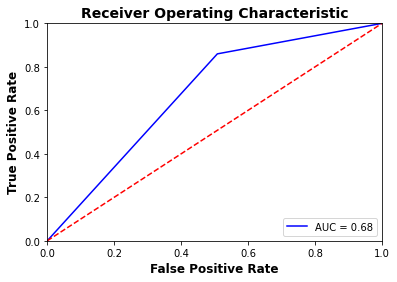

In [114]:
##Source:https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
# predictions = model1.predict(X)
fpr, tpr, threshold = metrics.roc_curve(y_test.values, (predictions>0.50).astype(int).values.reshape(-1,1))
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic', fontsize=14, weight='bold')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=12, weight='bold')
plt.xlabel('False Positive Rate', fontsize=12, weight='bold')
plt.show()

In [115]:
for i in np.linspace(0,1,30,endpoint=False):
    fpr, tpr, threshold = metrics.roc_curve(y_test.values, (predictions>i).astype(int).values.reshape(-1,1))
    roc_auc = round(metrics.auc(fpr, tpr),3)
    x = round(i,2)
    print(f"{x} has {roc_auc}")

0.0 has 0.5
0.03 has 0.504
0.07 has 0.512
0.1 has 0.52
0.13 has 0.531
0.17 has 0.54
0.2 has 0.55
0.23 has 0.57
0.27 has 0.58
0.3 has 0.603
0.33 has 0.618
0.37 has 0.632
0.4 has 0.653
0.43 has 0.656
0.47 has 0.661
0.5 has 0.676
0.53 has 0.67
0.57 has 0.681
0.6 has 0.697
0.63 has 0.7
0.67 has 0.702
0.7 has 0.71
0.73 has 0.7
0.77 has 0.702
0.8 has 0.702
0.83 has 0.68
0.87 has 0.666
0.9 has 0.645
0.93 has 0.607
0.97 has 0.562


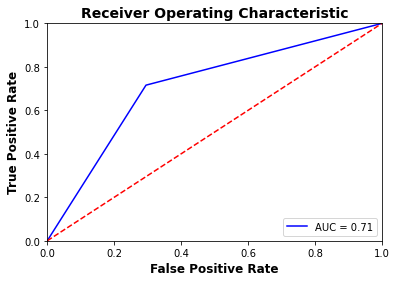

In [116]:
##Source:https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
# predictions = model1.predict(X)
fpr, tpr, threshold = metrics.roc_curve(y_test.values, (predictions>0.70).astype(int).values.reshape(-1,1))
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic', fontsize=14, weight='bold')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=12, weight='bold')
plt.xlabel('False Positive Rate', fontsize=12, weight='bold')
plt.show()

 - __What happens if we club above significant dummies to reduce parsimonious model__
 - __Can we gain enough AUC by reducing the parsimonious feature?__

In [117]:
# df = pd.read_excel("E:/IIM-A Docs/RA/Logistic Regression/Quiz2/ra_logit_fe.xlsx", sheet_name=0, index_col=None, header=0)
# df.head(4)

# df_keep = df.copy()

# df_keep = df_keep.loc[:, ["RESPONSE", "CHK_ACCT1", "DURATION", "HISTORY1", "NEW_CAR", "USED_CAR", "SAV_ACCT1",
#                          "EMPLOYMENT", "GUARANTOR", "REAL_ESTATE", "RENT", "FOREIGN"]]

# dummies_CHK_ACCT1 = pd.get_dummies(df_keep['CHK_ACCT1'], prefix="CHK_ACCT", drop_first=True)

# dummies_HISTORY1 = pd.get_dummies(df_keep['HISTORY1'], prefix="HISTORY", drop_first=True)

# dummies_NEW_CAR = pd.get_dummies(df_keep['NEW_CAR'], prefix="NEW_CAR", drop_first=True)

# dummies_USED_CAR = pd.get_dummies(df_keep['USED_CAR'], prefix="USED_CAR", drop_first=True)

# dummies_SAV_ACCT1 = pd.get_dummies(df_keep['SAV_ACCT1'], prefix="SAV_ACCT", drop_first=True)

# dummies_EMPLOYMENT = pd.get_dummies(df_keep['EMPLOYMENT'], prefix="EMPLOYMENT", drop_first=True)

# dummies_GUARANTOR = pd.get_dummies(df_keep['GUARANTOR'], prefix="GUARANTOR", drop_first=True)

# dummies_REAL_ESTATE = pd.get_dummies(df_keep['REAL_ESTATE'], prefix="REAL_ESTATE", drop_first=True)

# dummies_RENT = pd.get_dummies(df_keep['RENT'], prefix="RENT", drop_first=True)

# dummies_FOREIGN = pd.get_dummies(df_keep['FOREIGN'], prefix="FOREIGN", drop_first=True)

# merged1 = pd.concat([df_keep,
#                     dummies_CHK_ACCT1,
#                     dummies_HISTORY1,
#                     dummies_NEW_CAR,
#                     dummies_USED_CAR,
#                     dummies_SAV_ACCT1,
#                     dummies_EMPLOYMENT,
#                     dummies_GUARANTOR,
#                     dummies_REAL_ESTATE,
#                     dummies_RENT,
#                     dummies_FOREIGN], axis='columns')

# merged1.drop(['CHK_ACCT1', 'HISTORY1', 'NEW_CAR', 'USED_CAR', 'SAV_ACCT1',
#              'EMPLOYMENT', 'GUARANTOR',
#              'REAL_ESTATE', 'RENT', 'FOREIGN'],
#             axis=1, inplace=True)

# y = merged1.loc[:, ["RESPONSE"]]
# X = merged1.loc[:, ['CHK_ACCT_1',
#                    'DURATION',
#                    'HISTORY_1', 'HISTORY_2',
#                    'NEW_CAR_1',
#                    'USED_CAR_1',
#                    'SAV_ACCT_1', 'SAV_ACCT_2', 'SAV_ACCT_3',
#                    'EMPLOYMENT_1', 'EMPLOYMENT_2', 'EMPLOYMENT_3', 'EMPLOYMENT_4',
#                    'GUARANTOR_1',
#                    'REAL_ESTATE_1',
#                    'RENT_1',
#                    'FOREIGN_1']]

# ##Push 40% to test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

# # features
# X_iter = X_train[['CHK_ACCT_1', 'DURATION',
#                  'HISTORY_2',
#                  'NEW_CAR_1', 'USED_CAR_1',
#                  'SAV_ACCT_2',
#                  'EMPLOYMENT_3',
#                  'GUARANTOR_1',
#                  'REAL_ESTATE_1', 'RENT_1',
#                  'FOREIGN_1']] 
# # adding a constant
# X_iter = sm.add_constant(X_iter)

# model = sm.Logit(y_train, X_iter).fit()

# X_iter_p = X_test[['CHK_ACCT_1', 'DURATION',
#                   'HISTORY_2',
#                   'NEW_CAR_1', 'USED_CAR_1',
#                   'SAV_ACCT_2',
#                   'EMPLOYMENT_3',
#                   'GUARANTOR_1',
#                   'REAL_ESTATE_1', 'RENT_1',
#                   'FOREIGN_1']]
# X_iter_p = sm.add_constant(X_iter_p)
# predictions = model.predict(X_iter_p)
    
# print(model.summary())
# print(model.aic)

# for i in np.linspace(0,1,20,endpoint=False):
#     fpr, tpr, threshold = metrics.roc_curve(y_test.values, (predictions>i).astype(int).values.reshape(-1,1))
#     roc_auc = round(metrics.auc(fpr, tpr),3)
#     x = round(i,2)
#     print(f"{x} has {roc_auc}")

__Looks like AUC is not increasing and AIC is more then parsimonious model shown above__

In [118]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1',
                 'FOREIGN_1',
                 'FURNITURE_0']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1',
                  'FOREIGN_1',
                  'FURNITURE_0']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.448139
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      582
Method:                           MLE   Df Model:                           17
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2629
Time:                        21:08:21   Log-Likelihood:                -268.88
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 1.238e-31
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.7588      0.494     -1.537      0.124      -1.726       0.209
CHK_ACCT_1        0.

In [119]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1',
                 'FOREIGN_1',
                 'RADIO_TV_0']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1',
                  'FOREIGN_1',
                  'RADIO_TV_0']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.448410
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      582
Method:                           MLE   Df Model:                           17
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2625
Time:                        21:08:21   Log-Likelihood:                -269.05
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 1.438e-31
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.7987      0.510     -1.566      0.117      -1.798       0.201
CHK_ACCT_1        0.

In [120]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1',
                 'FOREIGN_1',
                 'EDUCATION_0']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1',
                  'FOREIGN_1',
                  'EDUCATION_0']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.447470
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      582
Method:                           MLE   Df Model:                           17
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2640
Time:                        21:08:21   Log-Likelihood:                -268.48
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 8.546e-32
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.3874      0.626     -2.217      0.027      -2.614      -0.161
CHK_ACCT_1        0.

In [121]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1',
                 'FOREIGN_1',
                 'RETRAINING_0']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1',
                  'FOREIGN_1',
                  'RETRAINING_0']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.448289
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      582
Method:                           MLE   Df Model:                           17
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2627
Time:                        21:08:22   Log-Likelihood:                -268.97
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 1.345e-31
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.0803      0.559     -1.933      0.053      -2.175       0.015
CHK_ACCT_1        0.

In [122]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1',
                 'FOREIGN_1',
                 'MALE_DIV_0']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1',
                  'FOREIGN_1',
                  'MALE_DIV_0']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.448507
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      582
Method:                           MLE   Df Model:                           17
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2623
Time:                        21:08:22   Log-Likelihood:                -269.10
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 1.517e-31
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.9943      0.602     -1.652      0.099      -2.174       0.185
CHK_ACCT_1        0.

In [123]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1',
                 'FOREIGN_1',
                 'MALE_SINGLE_0']] 
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1',
                  'FOREIGN_1',
                  'MALE_SINGLE_0']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.448546
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      582
Method:                           MLE   Df Model:                           17
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2623
Time:                        21:08:22   Log-Likelihood:                -269.13
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 1.550e-31
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.9086      0.466     -1.951      0.051      -1.821       0.004
CHK_ACCT_1        0.

In [124]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1',
                 'FOREIGN_1',
                 'MALE_MAR_WID_0']]
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1',
                  'FOREIGN_1',
                  'MALE_MAR_WID_0']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.448558
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      582
Method:                           MLE   Df Model:                           17
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2623
Time:                        21:08:22   Log-Likelihood:                -269.13
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 1.561e-31
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.8888      0.565     -1.572      0.116      -1.997       0.219
CHK_ACCT_1       

In [125]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1',
                 'FOREIGN_1',
                 'COAPPLICANT_0']]
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1',
                  'FOREIGN_1',
                  'COAPPLICANT_0']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.447257
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      582
Method:                           MLE   Df Model:                           17
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2644
Time:                        21:08:22   Log-Likelihood:                -268.35
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 7.595e-32
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.5316      0.682     -2.244      0.025      -2.869      -0.194
CHK_ACCT_1        0.

In [126]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1',
                 'FOREIGN_1',
                 'PRESENT_RESIDENT_1']]
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1',
                  'FOREIGN_1',
                  'PRESENT_RESIDENT_1']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.448464
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      582
Method:                           MLE   Df Model:                           17
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2624
Time:                        21:08:22   Log-Likelihood:                -269.08
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 1.482e-31
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8806      0.457     -1.925      0.054      -1.777       0.016
CHK_A

In [127]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1',
                 'FOREIGN_1',
                 'PROP_UNKN_NONE_1']]
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1',
                  'FOREIGN_1',
                  'PROP_UNKN_NONE_1']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.447713
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      582
Method:                           MLE   Df Model:                           17
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2636
Time:                        21:08:22   Log-Likelihood:                -268.63
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 9.777e-32
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8468      0.458     -1.849      0.064      -1.744       0.051
CHK_ACCT_1 

In [128]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1',
                 'FOREIGN_1',
                 'OTHER_INSTALL_0']]
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1',
                  'FOREIGN_1',
                  'OTHER_INSTALL_0']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.448268
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      582
Method:                           MLE   Df Model:                           17
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2627
Time:                        21:08:22   Log-Likelihood:                -268.96
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 1.329e-31
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.9766      0.475     -2.057      0.040      -1.907      -0.046
CHK_ACCT_1    

In [129]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1',
                 'FOREIGN_1',
                 'JOB_0']]
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1',
                  'FOREIGN_1',
                  'JOB_0']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.448273
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      582
Method:                           MLE   Df Model:                           17
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2627
Time:                        21:08:22   Log-Likelihood:                -268.96
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 1.333e-31
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.9160      0.457     -2.005      0.045      -1.811      -0.021
CHK_ACCT_1        0.

In [130]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1',
                 'FOREIGN_1',
                 'TELEPHONE_0']]
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1',
                  'FOREIGN_1',
                  'TELEPHONE_0']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.446494
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      582
Method:                           MLE   Df Model:                           17
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2657
Time:                        21:08:22   Log-Likelihood:                -267.90
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 4.977e-32
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.6498      0.481     -1.350      0.177      -1.593       0.294
CHK_ACCT_1        0.

In [131]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1',
                 'FOREIGN_1',
                 'T_Skilled_1', 'IR_Bin_1']]
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1',
                  'FOREIGN_1',
                  'T_Skilled_1', 'IR_Bin_1']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.440992
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      581
Method:                           MLE   Df Model:                           18
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2747
Time:                        21:08:22   Log-Likelihood:                -264.60
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 8.236e-33
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.7013      0.492     -1.426      0.154      -1.665       0.263
CHK_ACCT_1        0.

In [132]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1',
                 'FOREIGN_1',
                 'T_Skilled_1', 'Age_Bin_1']]
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1',
                  'FOREIGN_1',
                  'T_Skilled_1', 'Age_Bin_1']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.442832
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      581
Method:                           MLE   Df Model:                           18
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2717
Time:                        21:08:22   Log-Likelihood:                -265.70
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 2.275e-32
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.9678      0.476     -2.034      0.042      -1.900      -0.035
CHK_ACCT_1        0.

In [133]:
# features
X_iter = X_train[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                 'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                 'NEW_CAR_1', 'USED_CAR_1',
                 'SAV_ACCT_2', 'SAV_ACCT_4',
                 'EMPLOYMENT_3',
                 'GUARANTOR_1',
                 'REAL_ESTATE_1', 'RENT_1',
                 'FOREIGN_1',
                 'T_Skilled_1']]
# adding a constant
X_iter = sm.add_constant(X_iter)

model = sm.Logit(y_train, X_iter).fit()

X_iter_p = X_test[['CHK_ACCT_1', 'CHK_ACCT_2', 'CHK_ACCT_3', 'DURATION',
                  'HISTORY_2', 'HISTORY_3', 'HISTORY_4',
                  'NEW_CAR_1', 'USED_CAR_1',
                  'SAV_ACCT_2', 'SAV_ACCT_4',
                  'EMPLOYMENT_3',
                  'GUARANTOR_1',
                  'REAL_ESTATE_1', 'RENT_1',
                  'FOREIGN_1',
                  'T_Skilled_1']]
X_iter_p = sm.add_constant(X_iter_p)
predictions = model.predict(X_iter_p)
    
print(model.summary())
print(model.aic)

Optimization terminated successfully.
         Current function value: 0.442832
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               RESPONSE   No. Observations:                  600
Model:                          Logit   Df Residuals:                      582
Method:                           MLE   Df Model:                           17
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.2717
Time:                        21:08:22   Log-Likelihood:                -265.70
converged:                       True   LL-Null:                       -364.81
Covariance Type:            nonrobust   LLR p-value:                 6.533e-33
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.9709      0.457     -2.124      0.034      -1.867      -0.075
CHK_ACCT_1        0.

In [134]:
###Training metrics
##x = 0.67
x = 0.50
TP = model.pred_table(threshold=x)[1,1]
TN = model.pred_table(threshold=x)[0,0]
FN = model.pred_table(threshold=x)[0,1]
FP = model.pred_table(threshold=x)[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(model.pred_table())
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[ 95.  83.]
 [ 45. 377.]]
Model Accuracy is 0.787
F1-Score for Y=1 is 0.855
Recall Score for Y=1 or Sensitivity is 0.82
Precision Score for Y=1 is 0.893
F1-Score for Y=0 is 0.598
Recall Score for Y=0 or Specificity is 0.679
Precision Score for Y=0 is 0.534


In [135]:
##test_matrix = confusion_matrix(y_test.values, (predictions>0.67).astype(int).values.reshape(-1,1), labels=[0,1])
test_matrix = confusion_matrix(y_test.values, (predictions>0.50).astype(int).values.reshape(-1,1), labels=[0,1])

###Test metrics
TP = test_matrix[1,1]
TN = test_matrix[0,0]
FN = test_matrix[0,1]
FP = test_matrix[1,0]

model_accuracy = round((TP+TN)/(TP+TN+FP+FN),3)

Recall_1 = round(TP/(TP+FN),3)
Precision_1 = round(TP/(TP+FP),3)
F1score_1 = round(2*(Recall_1*Precision_1)/(Recall_1+Precision_1),3)

Recall_0 = round(TN/(TN+FP),3)
Precision_0 = round(TN/(TN+FN),3)
F1score_0 = round(2*(Recall_0*Precision_0)/(Recall_0+Precision_0),3)

print(test_matrix)
print(f"Model Accuracy is {model_accuracy}")
print(f"F1-Score for Y=1 is {F1score_1}")
print(f"Recall Score for Y=1 or Sensitivity is {Recall_1}")
print(f"Precision Score for Y=1 is {Precision_1}")
print(f"F1-Score for Y=0 is {F1score_0}")
print(f"Recall Score for Y=0 or Specificity is {Recall_0}")
print(f"Precision Score for Y=0 is {Precision_0}")

[[ 59  63]
 [ 41 237]]
Model Accuracy is 0.74
F1-Score for Y=1 is 0.82
Recall Score for Y=1 or Sensitivity is 0.79
Precision Score for Y=1 is 0.853
F1-Score for Y=0 is 0.532
Recall Score for Y=0 or Specificity is 0.59
Precision Score for Y=0 is 0.484


In [136]:
for i in np.linspace(0,1,30,endpoint=False):
    fpr, tpr, threshold = metrics.roc_curve(y_test.values, (predictions>i).astype(int).values.reshape(-1,1))
    roc_auc = round(metrics.auc(fpr, tpr),3)
    x = round(i,2)
    print(f"{x} has {roc_auc}")

0.0 has 0.5
0.03 has 0.504
0.07 has 0.52
0.1 has 0.527
0.13 has 0.531
0.17 has 0.537
0.2 has 0.558
0.23 has 0.578
0.27 has 0.597
0.3 has 0.597
0.33 has 0.613
0.37 has 0.625
0.4 has 0.643
0.43 has 0.654
0.47 has 0.675
0.5 has 0.668
0.53 has 0.684
0.57 has 0.686
0.6 has 0.694
0.63 has 0.701
0.67 has 0.708
0.7 has 0.698
0.73 has 0.705
0.77 has 0.704
0.8 has 0.687
0.83 has 0.676
0.87 has 0.663
0.9 has 0.638
0.93 has 0.597
0.97 has 0.557


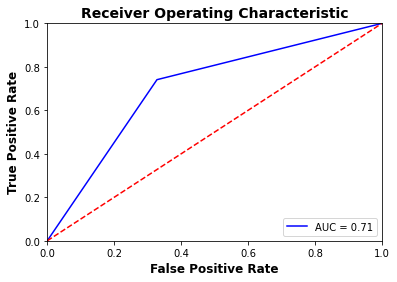

In [137]:
##Source:https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
# predictions = model1.predict(X)
fpr, tpr, threshold = metrics.roc_curve(y_test.values, (predictions>0.67).astype(int).values.reshape(-1,1))
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic', fontsize=14, weight='bold')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=12, weight='bold')
plt.xlabel('False Positive Rate', fontsize=12, weight='bold')
plt.show()

__Plotting model stats from iterations show above__

In [138]:
url = "https://raw.githubusercontent.com/arimitramaiti/datasets/master/articles/ra_logit_model_iter_stats.csv"
model_stats = pd.read_csv(url, error_bad_lines=False, header=0, index_col=None)
model_stats.head(4)

,Iter,Train_AIC,Train_R2,Train_LL,Train_F1-Score_Good,Train_Sensitivity_Good,Train_F1-Score_Bad,Train_Specificity_Bad,Test_F1-Score_Good,Test_Sensitivity_Good,Test_F1-Score_Bad,Test_Specificity_Bad
0,1,652.47,0.1167,-322.24,0.801,0.790,0.506,0.524,0.765,0.747,0.417,0.444
1,2,635.87,0.1422,-312.94,0.830,0.764,0.433,0.606,0.812,0.745,0.391,0.552
2,3,616.75,0.1766,-300.38,0.844,0.788,0.513,0.658,0.824,0.781,0.510,0.600
3,4,609.20,0.1897,-295.60,0.845,0.794,0.530,0.658,0.811,0.768,0.474,0.562


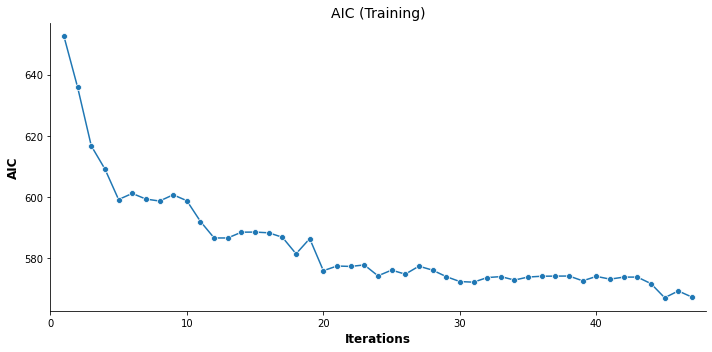

In [139]:
fig, ax = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)

sns.lineplot(x='Iter', y='Train_AIC', data=model_stats, marker="o", ax=ax)
ax.set_aspect('auto')
ax.set_xlim(xmin=0, xmax=48)
ax.set_xbound(lower=0, upper=48)
# ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
# ax.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
ax.set_title("AIC (Training)", fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Iterations', fontsize=12, weight='bold')
ax.set_ylabel('AIC', fontsize=12, weight='bold');

fig.tight_layout()
plt.show()

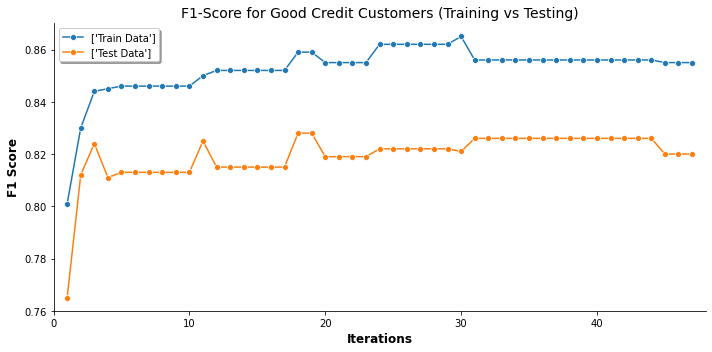

In [140]:
fig, ax = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)

sns.lineplot(x='Iter', y='Train_F1-Score_Good', data=model_stats, marker="o", ax=ax, label=['Train Data'])
sns.lineplot(x='Iter', y='Test_F1-Score_Good', data=model_stats, marker="o", ax=ax, label=['Test Data'])
ax.set_aspect('auto')
ax.set_xlim(xmin=0, xmax=48)
ax.set_xbound(lower=0, upper=48)
# ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
# ax.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
ax.set_title("F1-Score for Good Credit Customers (Training vs Testing)", fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Iterations', fontsize=12, weight='bold')
ax.set_ylabel('F1 Score', fontsize=12, weight='bold')
ax.legend(loc='best', shadow=True,fontsize='medium');

fig.tight_layout()
plt.show()

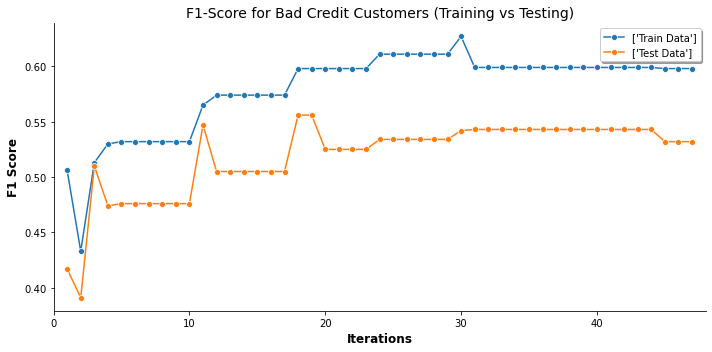

In [141]:
fig, ax = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)

sns.lineplot(x='Iter', y='Train_F1-Score_Bad', data=model_stats, marker="o", ax=ax, label=['Train Data'])
sns.lineplot(x='Iter', y='Test_F1-Score_Bad', data=model_stats, marker="o", ax=ax, label=['Test Data'])
ax.set_aspect('auto')
ax.set_xlim(xmin=0, xmax=48)
ax.set_xbound(lower=0, upper=48)
# ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
# ax.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
ax.set_title("F1-Score for Bad Credit Customers (Training vs Testing)", fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Iterations', fontsize=12, weight='bold')
ax.set_ylabel('F1 Score', fontsize=12, weight='bold')
ax.legend(loc='best', shadow=True,fontsize='medium');

fig.tight_layout()
plt.show()

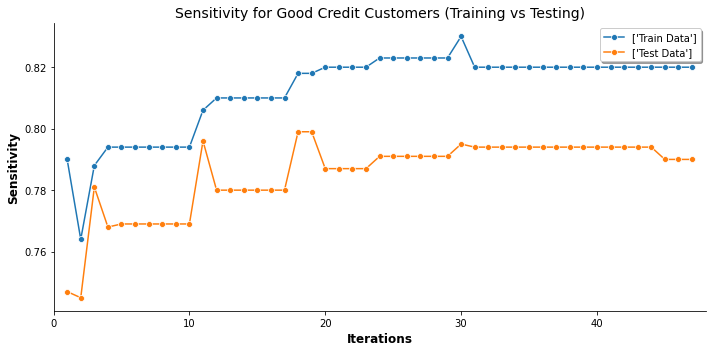

In [142]:
fig, ax = plt.subplots(figsize=(10,5))
fig.subplots_adjust(top=0.7)

sns.lineplot(x='Iter', y='Train_Sensitivity_Good', data=model_stats, marker="o", ax=ax, label=['Train Data'])
sns.lineplot(x='Iter', y='Test_Sensitivity_Good', data=model_stats, marker="o", ax=ax, label=['Test Data'])
ax.set_aspect('auto')
ax.set_xlim(xmin=0, xmax=48)
ax.set_xbound(lower=0, upper=48)
# ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
# ax.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
ax.set_title("Sensitivity for Good Credit Customers (Training vs Testing)", fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Iterations', fontsize=12, weight='bold')
ax.set_ylabel('Sensitivity', fontsize=12, weight='bold')
ax.legend(loc='best', shadow=True,fontsize='medium');

fig.tight_layout()
plt.show()

In [143]:
print(model.params)

const           -0.970900
CHK_ACCT_1       0.756555
CHK_ACCT_2       1.593692
CHK_ACCT_3       1.850399
DURATION        -0.047040
HISTORY_2        1.317191
HISTORY_3        1.401622
HISTORY_4        1.968912
NEW_CAR_1       -0.739557
USED_CAR_1       1.576150
SAV_ACCT_2       1.033268
SAV_ACCT_4       1.045457
EMPLOYMENT_3     0.641848
GUARANTOR_1      1.113016
REAL_ESTATE_1    0.772285
RENT_1          -0.539539
FOREIGN_1        1.550358
T_Skilled_1      0.694177
dtype: float64


In [144]:
roc_auc_list = list()
x_list = list()
sen_list = list()
spec_list = list()
for i in np.linspace(0,1,30,endpoint=False):
    fpr, tpr, threshold = metrics.roc_curve(y_test.values, (predictions>i).astype(int).values.reshape(-1,1))
    roc_auc = round(metrics.auc(fpr, tpr),3)
    x = round(i,2)
    test_matrix = confusion_matrix(y_test.values, (predictions>i).astype(int).values.reshape(-1,1), labels=[0,1])
    TP = test_matrix[1,1]
    TN = test_matrix[0,0]
    FN = test_matrix[0,1]
    FP = test_matrix[1,0]
    Recall_1 = round(TP/(TP+FN),3)
    Recall_0 = round(TN/(TN+FP),3)
    
    roc_auc_list.append(roc_auc)
    x_list.append(x)
    sen_list.append(Recall_1)
    spec_list.append(Recall_0)

C:\Users\Debjani\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in longlong_scalars
  from ipykernel import kernelapp as app


In [145]:
a = pd.DataFrame(x_list, columns=["Cutoff"])
b = pd.DataFrame(roc_auc_list, columns=["AUC"])
c = pd.DataFrame(sen_list, columns=["Sensitivity"])
d = pd.DataFrame(spec_list, columns=["Specificity"])
e = pd.concat([a, b, c, d], axis='columns')
e.replace(np.nan,0, inplace=True)

del a,b,c,d
del roc_auc_list, x_list, sen_list, spec_list

In [146]:
e['fpr'] = 1- e['Specificity']

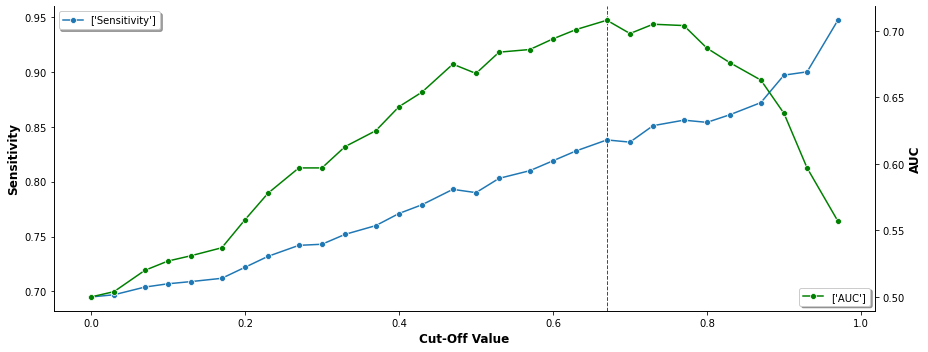

In [147]:
fig, ax1 = plt.subplots(figsize=(13,5))
fig.subplots_adjust(top=0.7)

sns.lineplot(x='Cutoff', y='Sensitivity', data=e, marker="o", ax=ax1, label=['Sensitivity'])
ax1.legend(loc='best', shadow=True,fontsize='medium')
ax1.axvline(x=0.67, color='red', linestyle='dashed', linewidth=1)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel('Cut-Off Value', fontsize=12, weight='bold')
ax1.set_ylabel('Sensitivity', fontsize=12, weight='bold')

ax2 = ax1.twinx()

sns.lineplot(x='Cutoff', y='AUC', data=e, marker="o", ax=ax2, label=['AUC'], color='green')
ax2.legend(loc='lower right', shadow=True,fontsize='medium');
ax2.spines['top'].set_visible(False)

ax2.set_ylabel('AUC', fontsize=12, weight='bold')

fig.tight_layout()
plt.show()

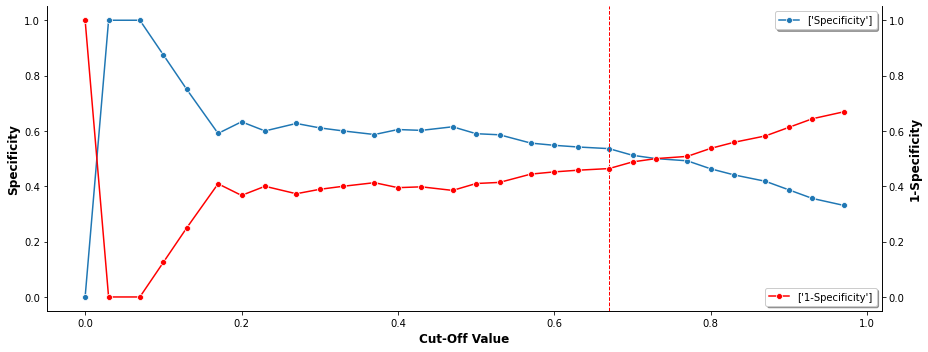

In [148]:
fig, ax1 = plt.subplots(figsize=(13,5))
fig.subplots_adjust(top=0.7)

sns.lineplot(x='Cutoff', y='Specificity', data=e, marker="o", ax=ax1, label=['Specificity'])
ax1.legend(loc='best', shadow=True,fontsize='medium')
ax1.spines['top'].set_visible(False)
ax1.axvline(x=0.67, color='red', linestyle='dashed', linewidth=1)
ax1.set_xlabel('Cut-Off Value', fontsize=12, weight='bold')
ax1.set_ylabel('Specificity', fontsize=12, weight='bold')

ax2 = ax1.twinx()

# sns.lineplot(x='Cutoff', y='AUC', data=e, marker="o", ax=ax2, label=['AUC'], color='green')
sns.lineplot(x='Cutoff', y='fpr', data=e, marker="o", ax=ax2, label=['1-Specificity'], color='red')
ax2.legend(loc='lower right', shadow=True,fontsize='medium');
ax2.spines['top'].set_visible(False)

ax2.set_ylabel('1-Specificity', fontsize=12, weight='bold')

fig.tight_layout()
plt.show()

__Thank You__